# Jamboree Admission Prediction Project

This notebook aims to analyze factors influencing graduate school admissions based on various parameters. The project involves:

1.  **Data Loading and Cleaning**: Reading the dataset, handling missing values, and preparing the data for analysis.
2.  **Exploratory Data Analysis (EDA)**: Visualizing the distribution of key variables and exploring relationships between them.
3.  **Correlation Analysis**: Examining the correlation between numerical and categorical features.
4.  **Regression Modeling**: Building a linear regression model to predict the chance of admission.
5.  **Clustering**: Applying K-means clustering to identify potential groups within the data.

In [ ]:

# specifying the path & reading contents of csv file into dataframe
df<-read.csv( "/content/Jamboree_Admission3 1.csv" )
df=data.frame(df)
# print contents of the csv file
print (df)
# View the first few rows and structure of the data
head(df)
str(df)

    Serial.No. GRE.Score TOEFL.Score University.Rating SOP LOR CGPA Research
1            1       337         118                 4 4.5 4.5 9.65  Present
2            2       324         107                 4 4.0 4.5 8.87  Present
3            3       316         104                 3 3.0 3.5 8.00  Present
4            4       322         110                 3 3.5 2.5 8.67  Present
5            5       314         103                 2 2.0 3.0 8.21   Absent
6            6       330         115                 5 4.5 3.0 9.34  Present
7            7       321         109                 3 3.0 4.0 8.20  Present
8            8       308         101                 2 3.0 4.0 7.90   Absent
9            9        NA         102                 1 2.0 1.5 8.00   Absent
10          10       323         108                 3 3.5 3.0 8.60   Absent
11          11       325         106                 3 3.5 4.0 8.40  Present
12          12       327         111                 4 4.0 4.5 9.00  Present

,Serial.No.,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,337,118,4,4.5,4.5,9.65,Present,0.92
2,2,324,107,4,4.0,4.5,8.87,Present,0.76
3,3,316,104,3,3.0,3.5,8.00,Present,0.72
4,4,322,110,3,3.5,2.5,8.67,Present,0.80
5,5,314,103,2,2.0,3.0,8.21,Absent,0.65
6,6,330,115,5,4.5,3.0,9.34,Present,0.90


'data.frame':	500 obs. of  9 variables:
 $ Serial.No.       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ GRE.Score        : int  337 324 316 322 314 330 321 308 NA 323 ...
 $ TOEFL.Score      : int  118 107 104 110 103 115 109 101 102 108 ...
 $ University.Rating: int  4 4 3 3 2 5 3 2 1 3 ...
 $ SOP              : num  4.5 4 3 3.5 2 4.5 3 3 2 3.5 ...
 $ LOR              : num  4.5 4.5 3.5 2.5 3 3 4 4 1.5 3 ...
 $ CGPA             : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8 8.6 ...
 $ Research         : chr  "Present" "Present" "Present" "Present" ...
 $ Chance.of.Admit  : num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.5 0.45 ...


In [ ]:

# Load the required libraries
#install.packages("caret")
install.packages("corrplot")
library(readxl)
library(dplyr)
library(ggplot2)
library(corrplot)
#library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.95 loaded



In [ ]:

# DATA CLEANING
# Step1:Remove missing values (if any)
df1= na.omit(df)
# Rename columns readability
colnames(df1) <- tolower(colnames(df1))
#converting relevant columns to factors (if categorical variables exist)
df1$research <- factor(df1$research,levels = c("Absent", "Present"),
                          labels = c(0, 1))

# Check for duplicates and remove them (if necessary)
df1 <- df1 %>% distinct()

#Remove unique row identifier
df1 <- df1[, -1]
df1
str(df1)
print(df1)

gre.score,toefl.score,university.rating,sop,lor,cgpa,research,chance.of.admit
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
337,118,4,4.5,4.5,9.65,1,0.92
324,107,4,4.0,4.5,8.87,1,0.76
316,104,3,3.0,3.5,8.00,1,0.72
322,110,3,3.5,2.5,8.67,1,0.80
314,103,2,2.0,3.0,8.21,0,0.65
330,115,5,4.5,3.0,9.34,1,0.90
321,109,3,3.0,4.0,8.20,1,0.75
308,101,2,3.0,4.0,7.90,0,0.68
323,108,3,3.5,3.0,8.60,0,0.45


'data.frame':	493 obs. of  8 variables:
 $ gre.score        : int  337 324 316 322 314 330 321 308 323 325 ...
 $ toefl.score      : int  118 107 104 110 103 115 109 101 108 106 ...
 $ university.rating: int  4 4 3 3 2 5 3 2 3 3 ...
 $ sop              : num  4.5 4 3 3.5 2 4.5 3 3 3.5 3.5 ...
 $ lor              : num  4.5 4.5 3.5 2.5 3 3 4 4 3 4 ...
 $ cgpa             : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8.6 8.4 ...
 $ research         : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 1 1 2 ...
 $ chance.of.admit  : num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.45 0.52 ...
    gre.score toefl.score university.rating sop lor cgpa research
1         337         118                 4 4.5 4.5 9.65        1
2         324         107                 4 4.0 4.5 8.87        1
3         316         104                 3 3.0 3.5 8.00        1
4         322         110                 3 3.5 2.5 8.67        1
5         314         103                 2 2.0 3.0 8.21        0
6         330         11

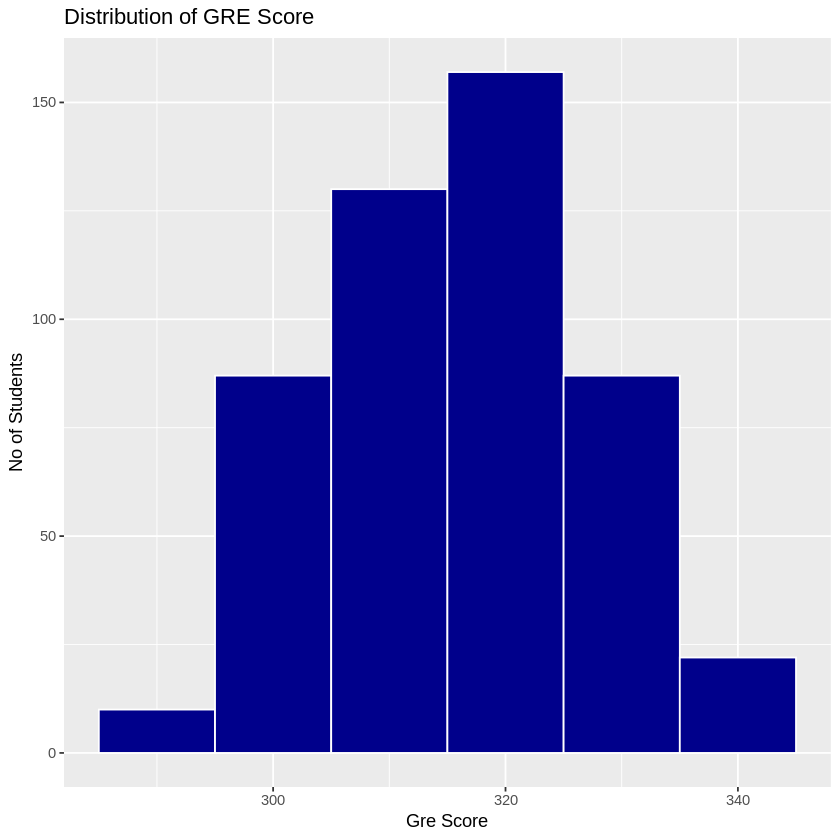

In [ ]:
#Plot GRE scores distirbution
ggplot(df1, aes(x = gre.score)) +
  geom_histogram(binwidth = 10, fill = "gold", color = "white") +
  labs(title = "Distribution of GRE Score", x = "Gre Score", y = "No of Students")

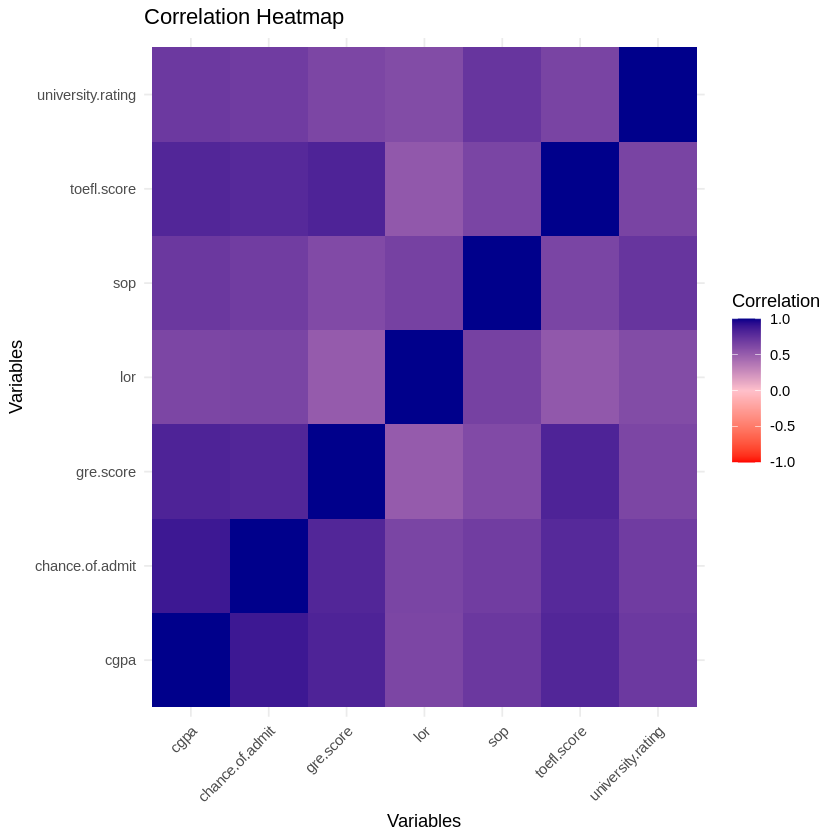

In [ ]:
# Heatmap using ggplot2
library(ggplot2)

# Select only numeric columns for correlation calculation
numeric_cols <- sapply(df1, is.numeric)
df1_numeric <- df1[, numeric_cols]

# Calculate correlation matrix
corr_matrix <- cor(df1_numeric, use = "complete")  # Handle missing values (if any)

# Convert the correlation matrix to a data frame for ggplot2
corr_df <- as.data.frame(corr_matrix)
corr_df$var1 <- rownames(corr_df)

# Reshape the data frame for ggplot2 using tidyr::gather or reshape2::melt
library(tidyr)  # or library(reshape2)
corr_df_long <- gather(corr_df, key = "var2", value = "correlation", -var1) # using tidyr::gather
# or
# corr_df_long <- melt(corr_df, id.vars = "var1", variable.name = "var2", value.name = "correlation") # using reshape2::melt

# Create the heatmap
ggplot(corr_df_long, aes(x = var2, y = var1, fill = correlation)) +
  geom_tile(width = 1, height = 1) +  # Fill with correlation values
  labs(title = "Correlation Heatmap", x = "Variables", y = "Variables") +
  theme_minimal() +  # Adjust theme for better readability
  scale_fill_gradient2(low = "red", mid = "pink", high = "dark blue",
                       midpoint = 0, limits = c(-1, 1), name = "Correlation") + # Adjust range for strong negative/positive correlations
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability


# Display the heatmap
ggsave("heatmap.png", width = 10, height = 8)  # Save the heatmap as an image (adjust size as needed)

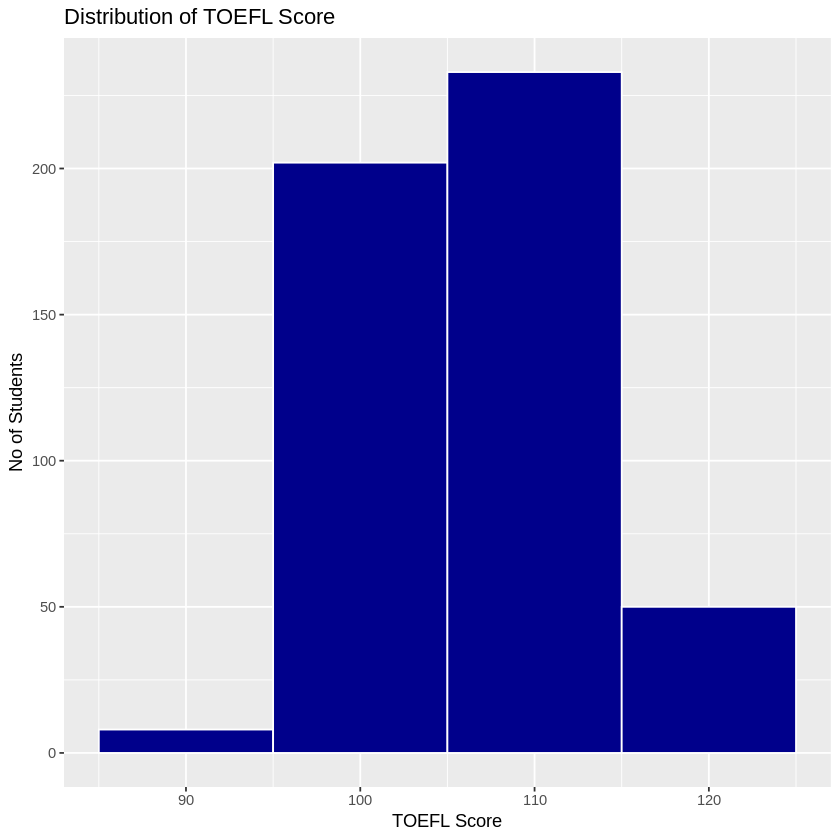

In [ ]:
#Plot TOEFL scores distirbution
ggplot(df1, aes(x = toefl.score)) +
  geom_histogram(binwidth = 10, fill = "darkblue", color = "white") +
  labs(title = "Distribution of TOEFL Score", x = "TOEFL Score", y = "No of Students")

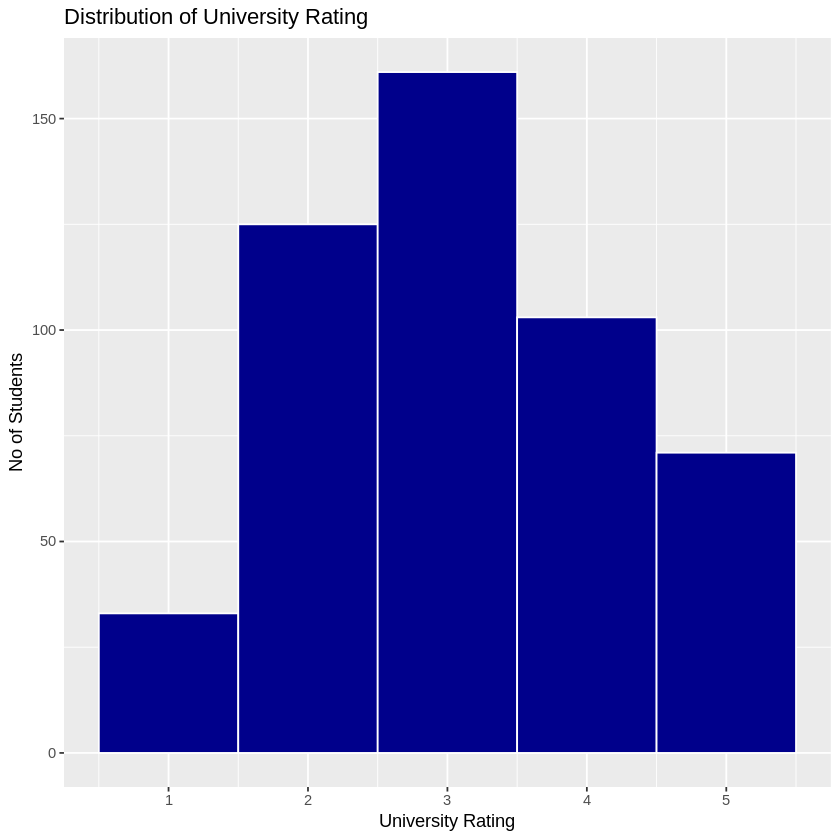

In [ ]:
#Plot University Rating distirbution
ggplot(df1, aes(x = university.rating)) +
  geom_histogram(binwidth = 1, fill = "darkblue", color = "white") +
  labs(title = "Distribution of University Rating", x = "University Rating", y = "No of Students")

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


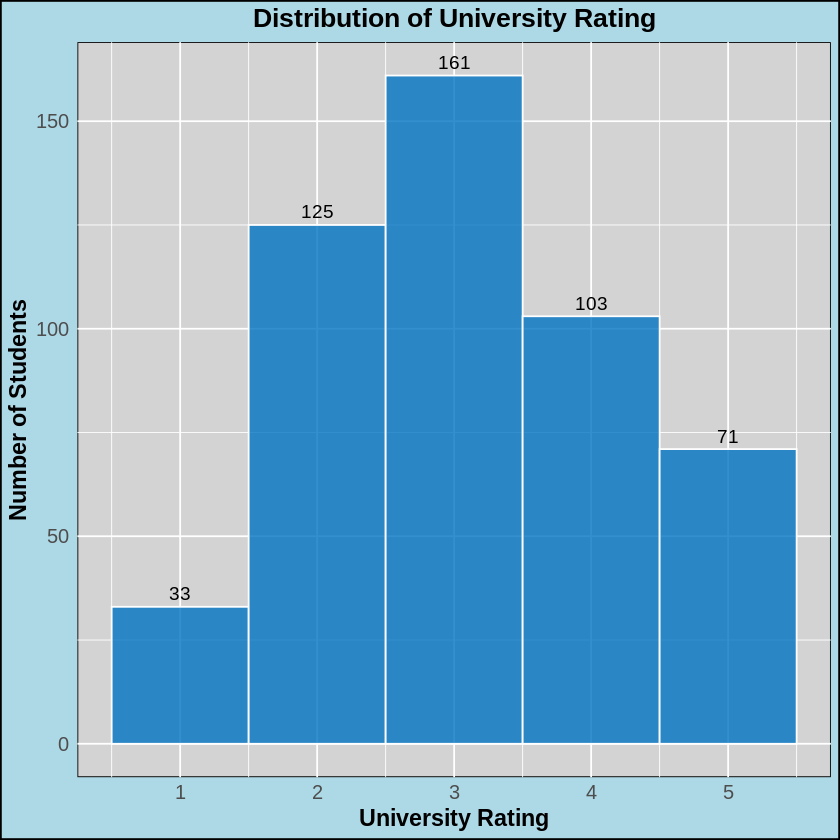

In [ ]:
library(ggplot2)

ggplot(df1, aes(x = university.rating)) +
  geom_histogram(binwidth = 1, fill = "#0073C2FF", color = "white", alpha = 0.8) +  # Gradient color and transparency
  geom_text(stat='count', aes(label=..count..), vjust=-0.5, size=4, color="black") + # Adding count labels
  labs(title = "Distribution of University Rating",
       x = "University Rating",
       y = "Number of Students") +
  theme_minimal() +  # Clean and simple theme
  scale_x_continuous(breaks = seq(min(df1$university.rating), max(df1$university.rating), 1)) +  # Custom x-axis breaks
  theme(d
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centered and bold title
    axis.title.x = element_text(size = 14, face = "bold"),             # X-axis title
    axis.title.y = element_text(size = 14, face = "bold"),             # Y-axis title
    axis.text = element_text(size = 12),                               # Axis text size
    panel.background = element_rect(fill = "lightgray"),  # Changes the background color of the plot panel
    plot.background = element_rect(fill = "lightblue", color = "black", size = 1),  # Changes the overall plot background
    panel.grid.major = element_line(color = "white"),   # Major grid lines
    panel.grid.minor = element_line(color = "white")    # Minor grid lines
  )


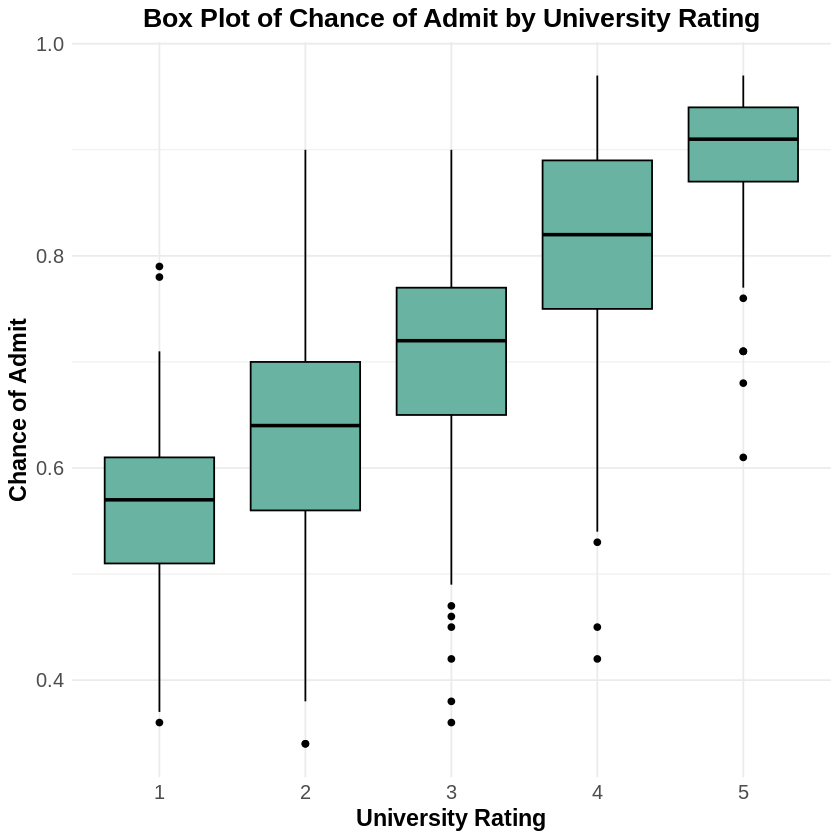

In [ ]:
ggplot(df1, aes(x = factor(university.rating), y = chance.of.admit)) +
  geom_boxplot(fill = "#69b3a2", color = "black") +
  labs(title = "Box Plot of Chance of Admit by University Rating",
       x = "University Rating",
       y = "Chance of Admit") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12)
  )


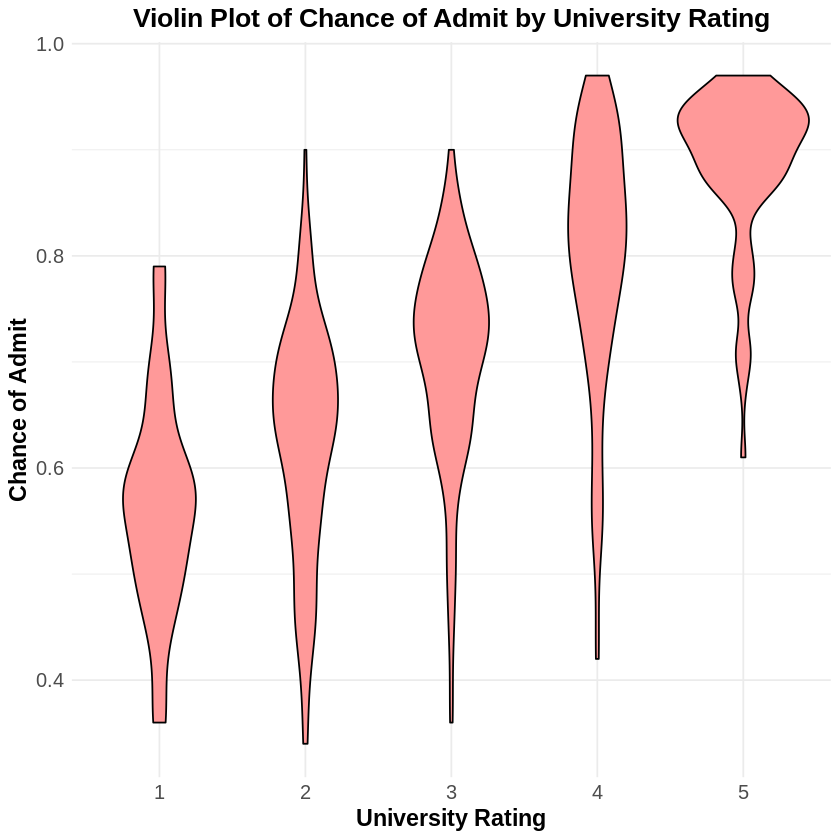

In [ ]:
ggplot(df1, aes(x = factor(university.rating), y = chance.of.admit)) +
  geom_violin(fill = "#FF9999", color = "black") +
  labs(title = "Violin Plot of Chance of Admit by University Rating",
       x = "University Rating",
       y = "Chance of Admit") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12)
  )


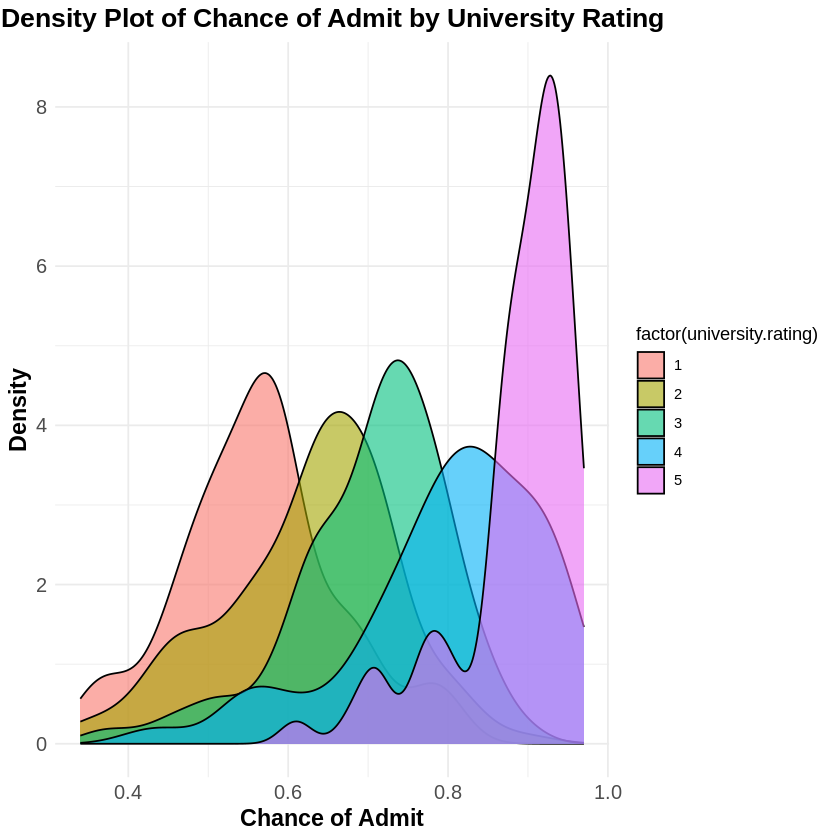

In [ ]:
ggplot(df1, aes(x = chance.of.admit, fill = factor(university.rating))) +
  geom_density(alpha = 0.6) +
  labs(title = "Density Plot of Chance of Admit by University Rating",
       x = "Chance of Admit",
       y = "Density") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12)
  )


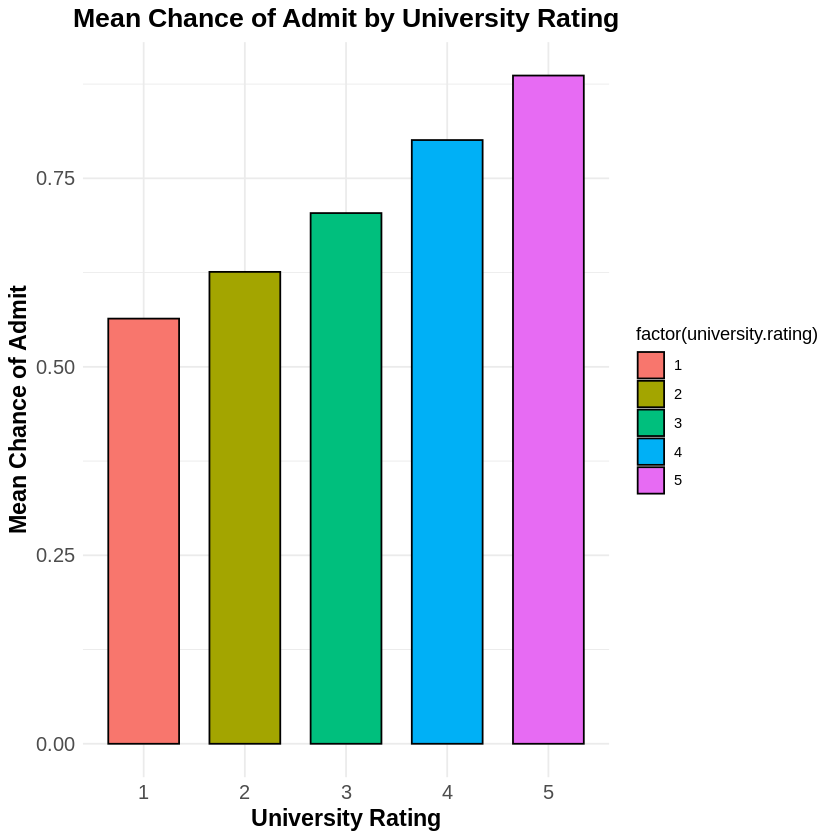

In [ ]:
ggplot(df1, aes(x = factor(university.rating), y = chance.of.admit, fill = factor(university.rating))) +
  stat_summary(fun = "mean", geom = "bar", color = "black", width = 0.7) +
  labs(title = "Mean Chance of Admit by University Rating",
       x = "University Rating",
       y = "Mean Chance of Admit") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12)
  )


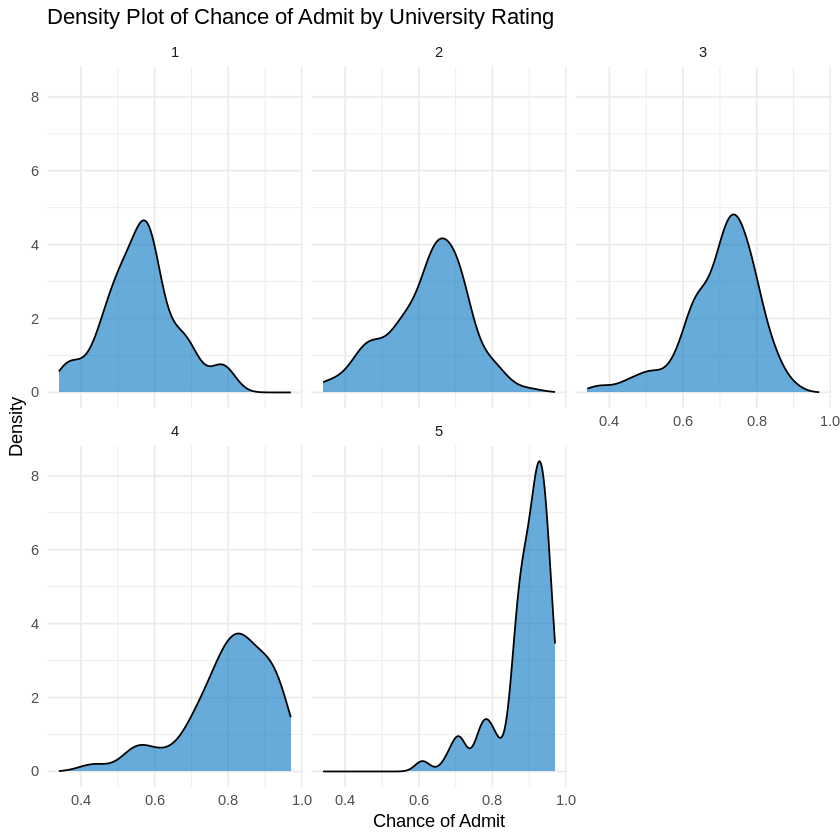

In [ ]:
ggplot(df1, aes(x = chance.of.admit)) +
  geom_density(fill = "#0073C2", alpha = 0.6) +
  labs(title = "Density Plot of Chance of Admit by University Rating",
       x = "Chance of Admit",
       y = "Density") +
  facet_wrap(~university.rating) +
  theme_minimal()


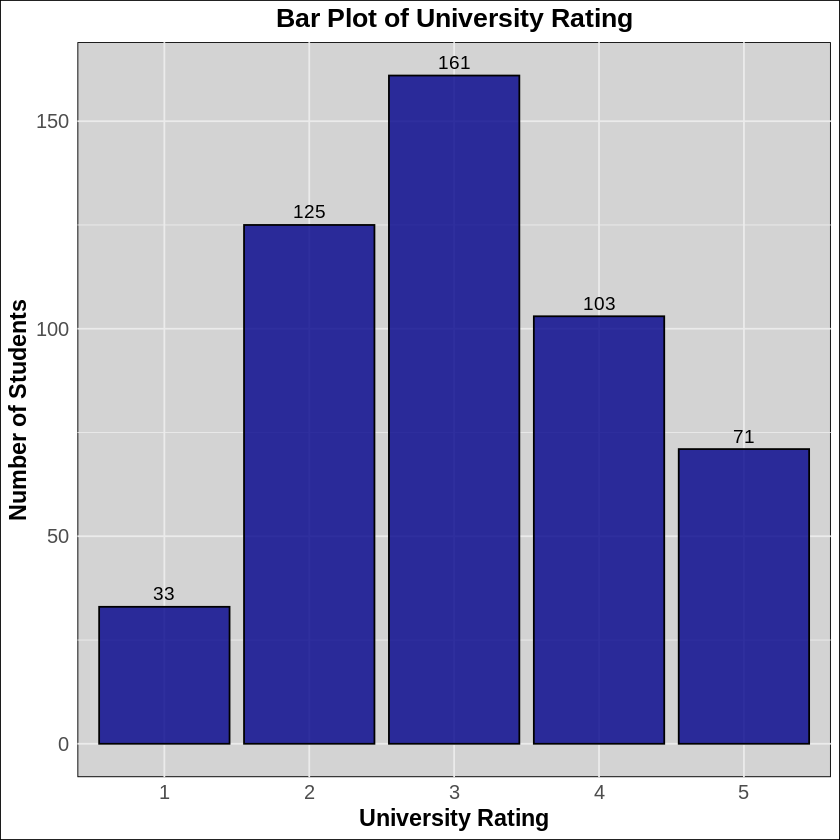

In [ ]:
library(ggplot2)

ggplot(df1, aes(x = factor(university.rating))) +
  geom_bar(fill = "darkblue", color = "black", alpha = 0.8) +  # Bar color and transparency
  geom_text(stat='count', aes(label=..count..), vjust=-0.5, size=4, color="black") + # Adding count labels
  labs(title = "Bar Plot of University Rating",
       x = "University Rating",
       y = "Number of Students") +
  theme_minimal() +  # Clean and simple theme
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centered and bold title
    axis.title.x = element_text(size = 14, face = "bold"),             # X-axis title
    axis.title.y = element_text(size = 14, face = "bold"),             # Y-axis title
    axis.text = element_text(size = 12),                               # Axis text size
    panel.background = element_rect(fill = "lightgray"),               # Panel background color
    plot.background = element_rect(fill = "white")                     # Overall background color
  )


In [ ]:
install.packages("plotly")  # Install if not already installed
   library(plotly)            # Load the plotly library
   plot_ly(
     x = rownames(correlation_matrix),
     y = colnames(correlation_matrix),
     z = correlation_matrix,
     type = "heatmap",
     colors = colorRampPalette(c("navy", "white", "darkred"))(100),
     text = round(correlation_matrix, 2)  # Text labels for correlation values
   ) %>%
     layout(
       title = "Interactive Correlation Heatmap",
       xaxis = list(title = ""),
       yaxis = list(title = "")
     )
     print("Correlation Matrix:")
   print(round(correlation_matrix, 3))  # Display rounded numerical values

   library(corrplot)
   library(ggplot2)  # In case you want ggplot2-based enhancements later
   library(reshape2) # Needed for ggplot2 method (melt)
   library(dplyr)    # For data manipulation
   library(RColorBrewer) # For custom color palettes
   correlation_matrix <- cor(df1[,c("gre.score", "toefl.score", "university.rating",
                                   "sop", "lor", "cgpa")])
                                   corrplot(correlation_matrix,
            method = "color",  # Color-filled boxes
            type = "upper",    # Display only the upper triangle
            addCoef.col = "black",  # Add correlation coefficients in black
            tl.col = "black",       # Text labels for variable names in black
            tl.srt = 45,          # Rotate variable labels by 45 degrees
            diag = FALSE,          # Exclude diagonal (self-correlation)
            col = brewer.pal(n = 8, name = "RdYlBu")  # Custom color palette
   )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error: object 'correlation_matrix' not found


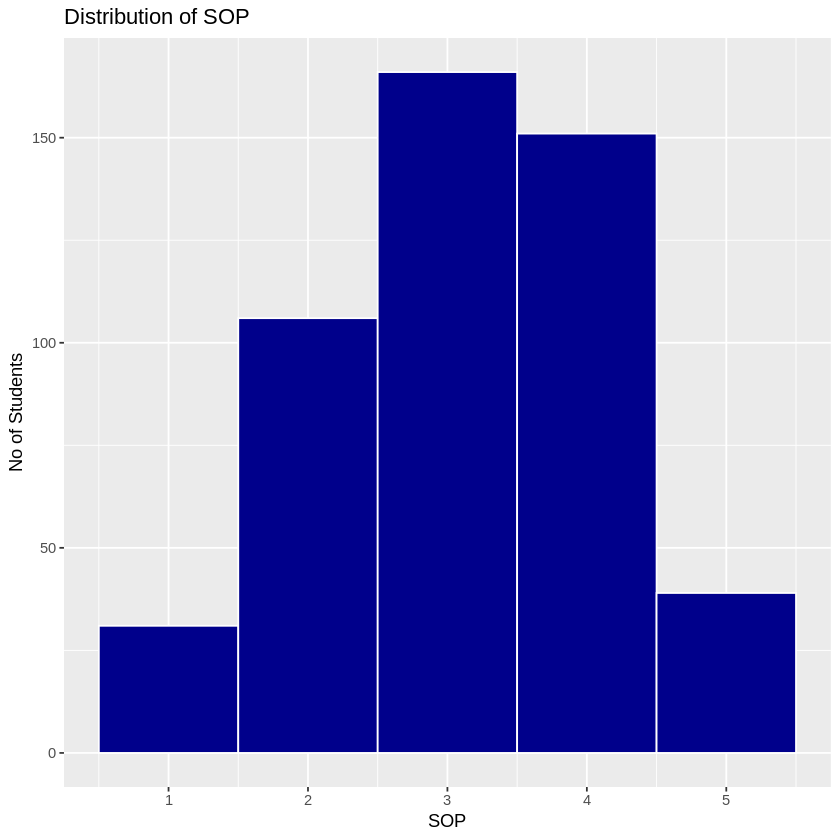

In [ ]:
#Plot SOP distirbution
ggplot(df1, aes(x = sop)) +
  geom_histogram(binwidth = 1, fill = "darkblue", color = "white") +
  labs(title = "Distribution of SOP", x = "SOP", y = "No of Students")

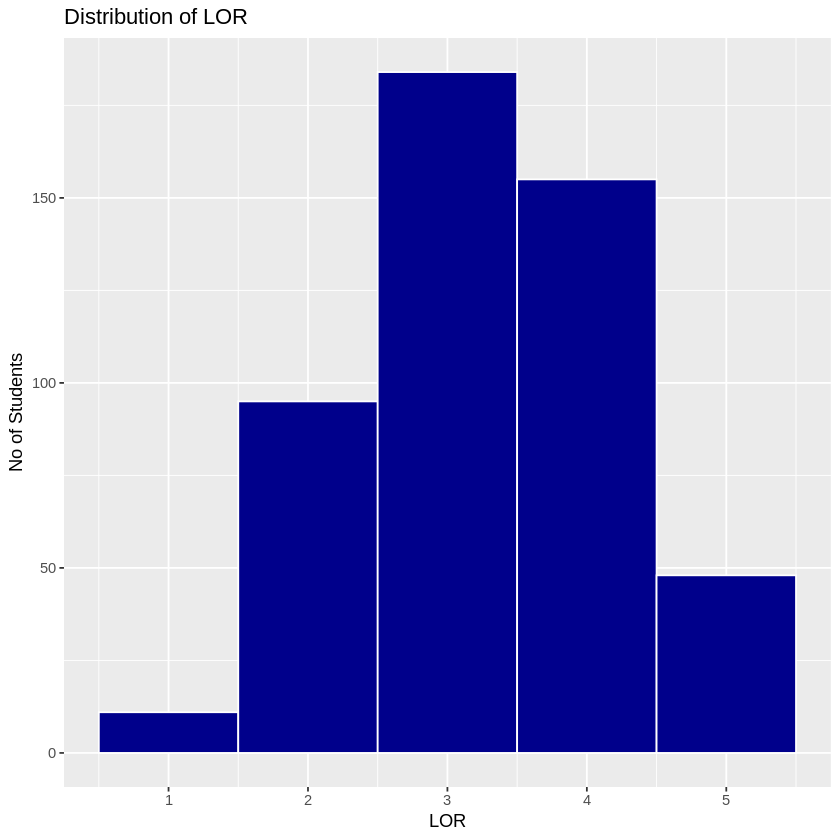

In [ ]:
#Plot LOR distirbution
ggplot(df1, aes(x = lor)) +
  geom_histogram(binwidth = 1, fill = "darkblue", color = "white") +
  labs(title = "Distribution of LOR", x = "LOR", y = "No of Students")

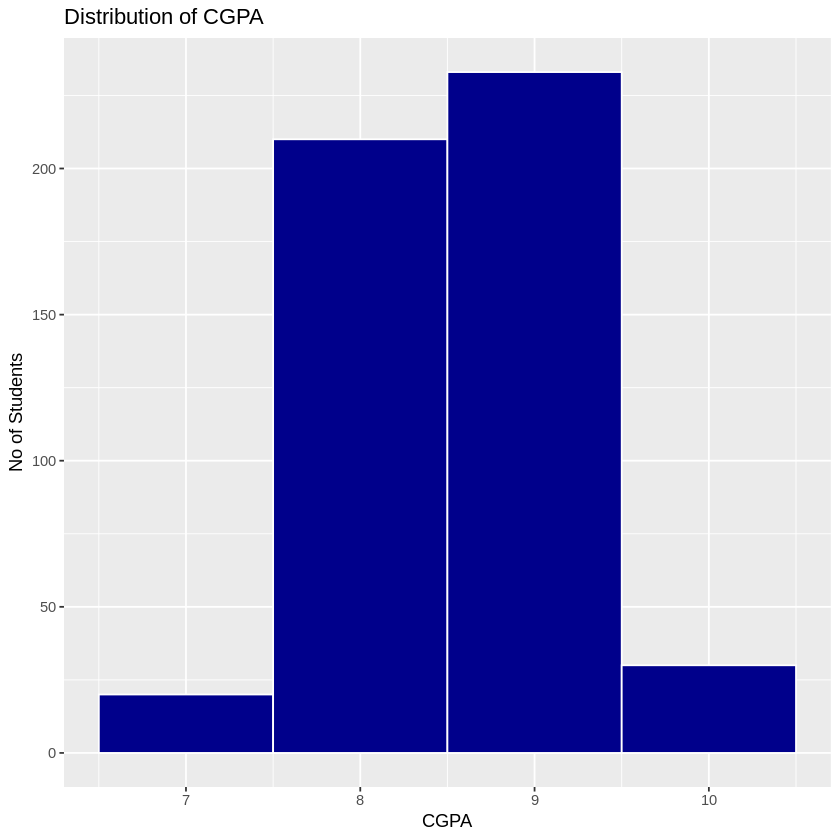

In [ ]:
#Plot CGPA distirbution
ggplot(df1, aes(x = cgpa)) +
  geom_histogram(binwidth = 1, fill = "darkblue", color = "white") +
  labs(title = "Distribution of CGPA", x = "CGPA", y = "No of Students")


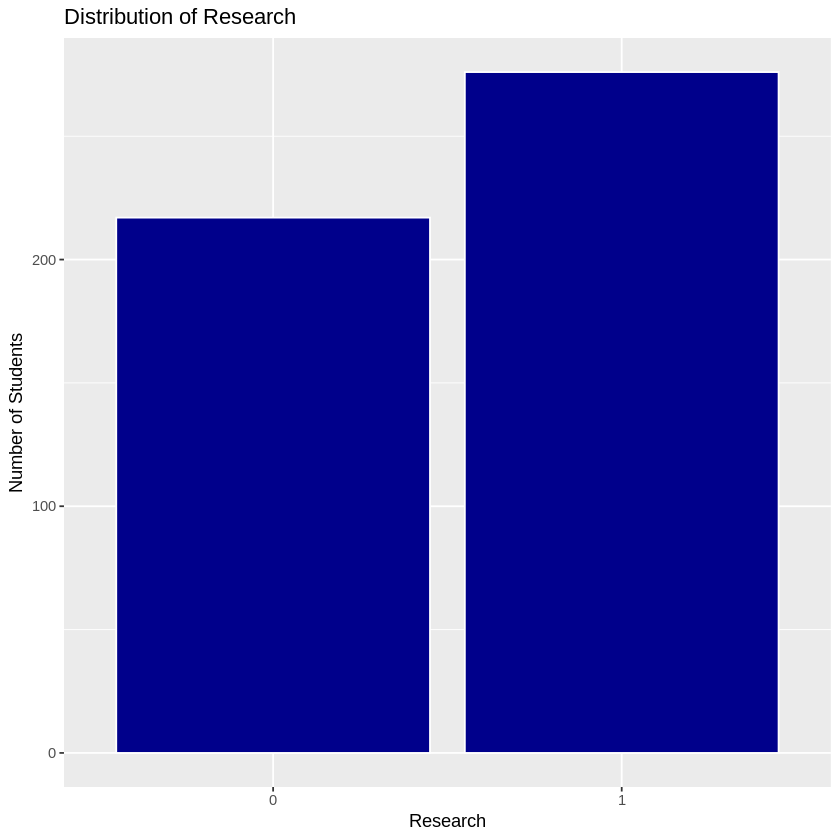

In [ ]:
#Plot Research distirbution
#n=c("Present","Absent")
ggplot(df1, aes(x = research)) +
  geom_bar(fill = "darkblue", color = "white") +
  labs(title = "Distribution of Research", x = "Research", y = "Number of Students")

# New Section

In [ ]:
# CORRELATION ANALYSIS
# Compute correlation matrix (only for numeric variables)
numeric_cols <- df1 %>% select_if(is.numeric)
cor_matrix <- cor(numeric_cols, use = "complete.obs")
print(cor_matrix)

                  gre.score toefl.score university.rating       sop       lor
gre.score         1.0000000   0.8240326         0.6286765 0.6067293 0.5161482
toefl.score       0.8240326   1.0000000         0.6445282 0.6385770 0.5340329
university.rating 0.6286765   0.6445282         1.0000000 0.7232994 0.6004538
sop               0.6067293   0.6385770         0.7232994 1.0000000 0.6580234
lor               0.5161482   0.5340329         0.6004538 0.6580234 1.0000000
cgpa              0.8232470   0.8080608         0.7002062 0.7072852 0.6310473
chance.of.admit   0.8086288   0.7904482         0.6850821 0.6794190 0.6369317
                       cgpa chance.of.admit
gre.score         0.8232470       0.8086288
toefl.score       0.8080608       0.7904482
university.rating 0.7002062       0.6850821
sop               0.7072852       0.6794190
lor               0.6310473       0.6369317
cgpa              1.0000000       0.8812387
chance.of.admit   0.8812387       1.0000000


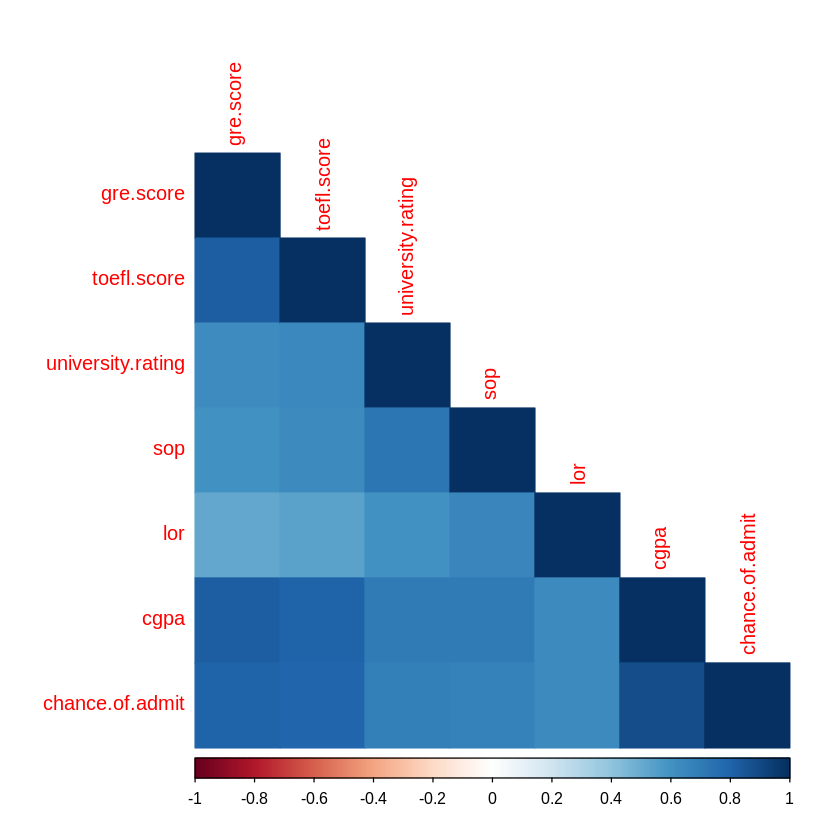

In [ ]:
# Visualize the correlation matrix
corrplot(cor_matrix, method = "color", type = "lower")

In [ ]:
categorical_cols <- names(df1)[sapply(df1, is.factor)]
print(categorical_cols) # Shows categorical column names
# Loop through each categorical variable
for (col in categorical_cols) {
    if (col != "research") { # Avoid comparing with itself
        contingency_table <- table(df1$research, df1[[col]]) # Note the [[ ]]
        assoc_stats <- assocstats(contingency_table)
        cramers_v <- assoc_stats$cramer

        cat("Cramer's V between research and", col, ":", cramers_v, "\n")
    }
}

[1] "research"


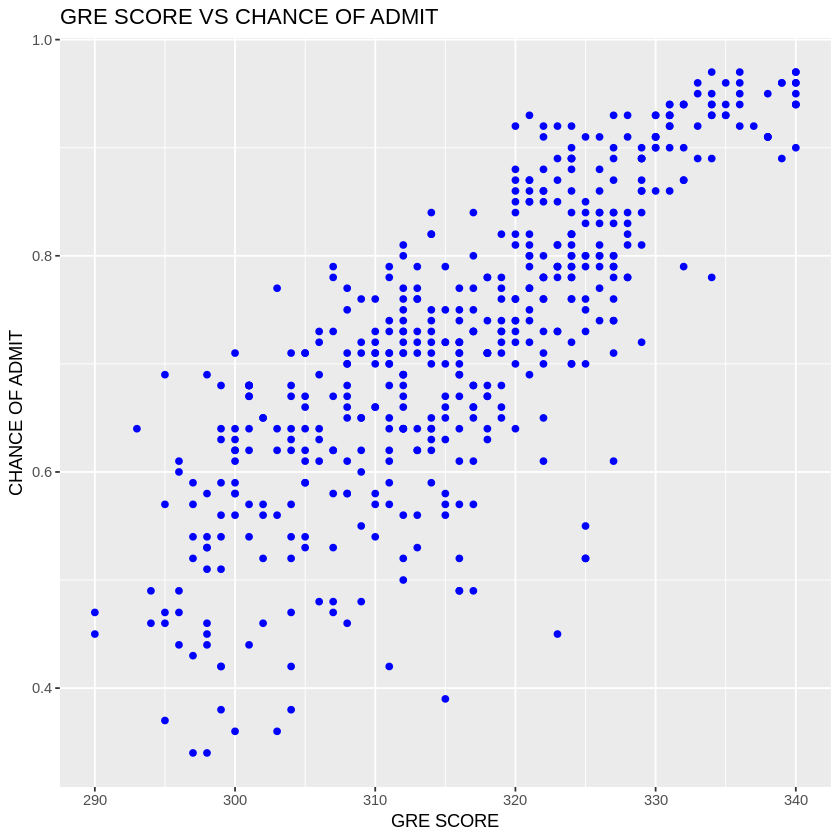

In [ ]:
# Scatter plot between two numeric variables "GRE VS CHANCE OF ADMIT"
ggplot(df1, aes(x = gre.score, y = chance.of.admit)) +
  geom_point(color = "blue" ) +
  labs(title = "GRE SCORE VS CHANCE OF ADMIT", x = "GRE SCORE", y = "CHANCE OF ADMIT")

`geom_smooth()` using formula = 'y ~ x'


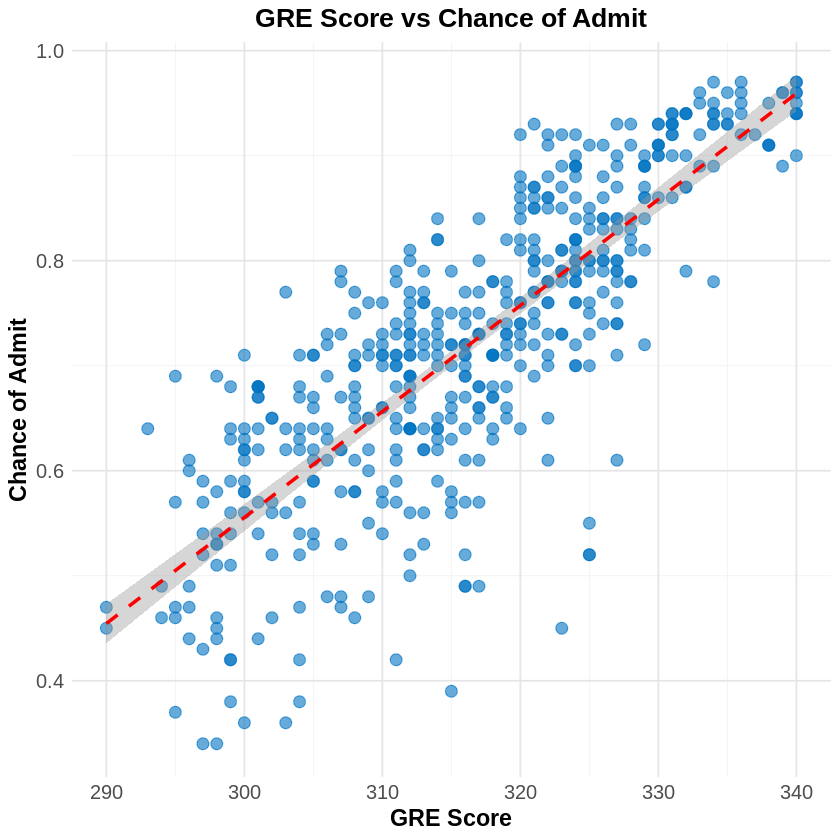

In [ ]:
library(ggplot2)

ggplot(df1, aes(x = gre.score, y = chance.of.admit)) +
  geom_point(color = "#0073C2FF", size = 3, alpha = 0.6) +  # Set point color, size, and transparency
  geom_smooth(method = "lm", color = "red", se = TRUE, linetype = "dashed") +  # Add trend line (linear model)
  labs(title = "GRE Score vs Chance of Admit",
       x = "GRE Score",
       y = "Chance of Admit") +
  theme_minimal() +  # Clean theme
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Title formatting
    axis.title.x = element_text(size = 14, face = "bold"),             # X-axis title formatting
    axis.title.y = element_text(size = 14, face = "bold"),             # Y-axis title formatting
    axis.text = element_text(size = 12),                               # Axis text size
    panel.grid.major = element_line(color = "gray90"),                 # Grid line color
    panel.grid.minor = element_line(color = "gray95")                  # Minor grid line color
  )


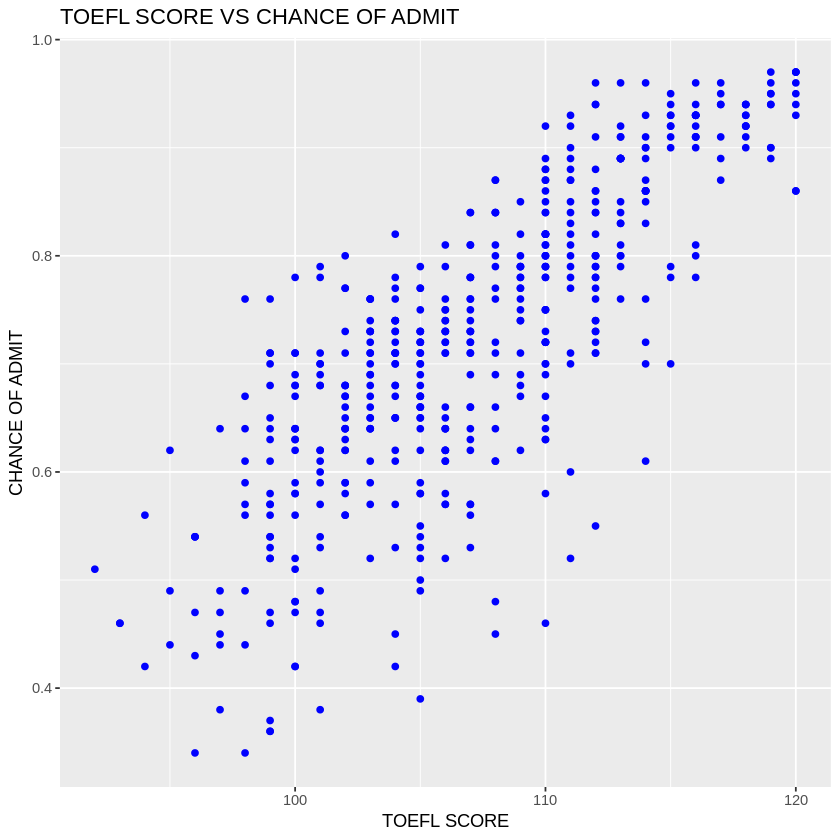

In [ ]:
# Scatter plot between two numeric variables "TOEFL VS CHANCE OF ADMIT"
ggplot(df1, aes(x = toefl.score, y = chance.of.admit)) +
  geom_point(color = "blue") +
  labs(title = "TOEFL SCORE VS CHANCE OF ADMIT", x = "TOEFL SCORE", y = "CHANCE OF ADMIT")

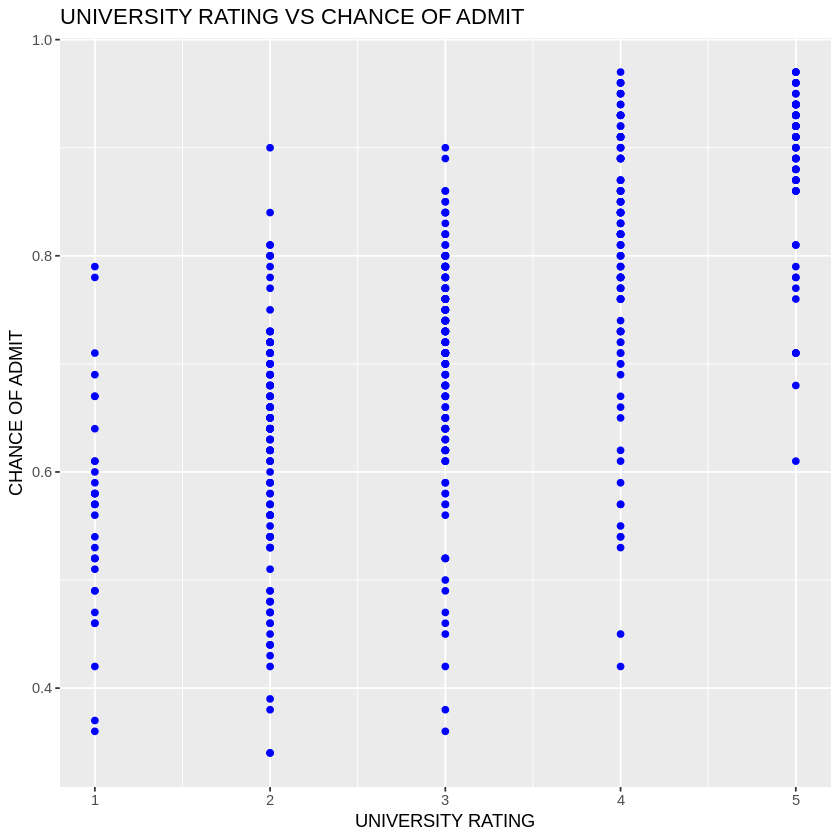

In [ ]:
# Scatter plot between two numeric variables "UNIVERSITY RATING VS CHANCE OF ADMIT"
ggplot(df1, aes(x = university.rating, y = chance.of.admit)) +
  geom_point(color = "blue") +
  labs(title = "UNIVERSITY RATING VS CHANCE OF ADMIT", x = "UNIVERSITY RATING", y = "CHANCE OF ADMIT")

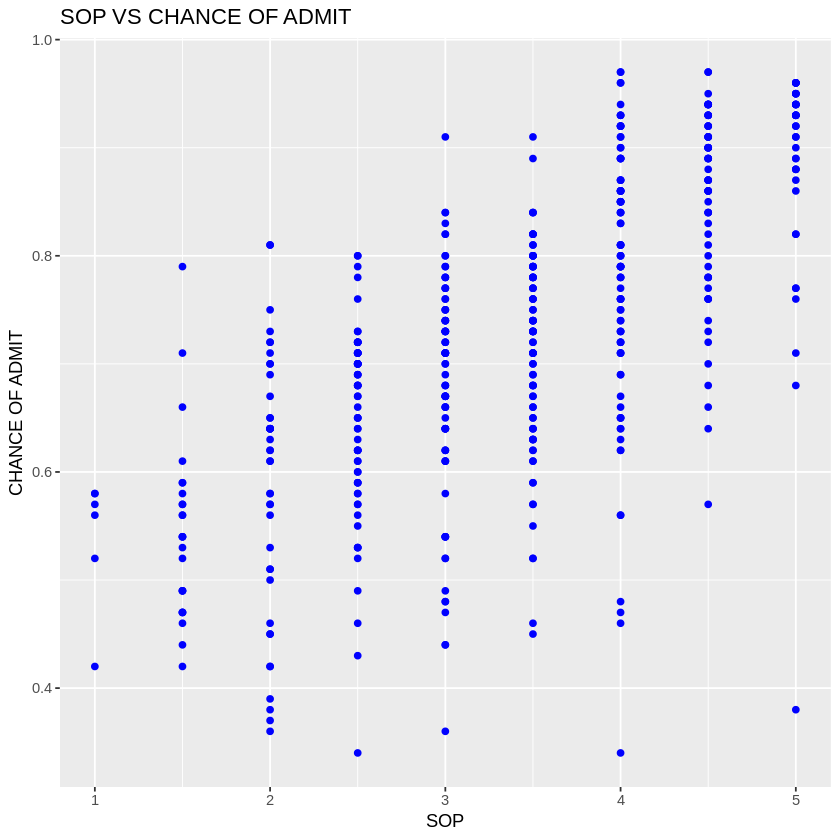

In [ ]:
# Scatter plot between two numeric variables "SOP VS CHANCE OF ADMIT"
ggplot(df1, aes(x = sop, y = chance.of.admit)) +
  geom_point(color = "blue") +
  labs(title = "SOP VS CHANCE OF ADMIT", x = "SOP", y = "CHANCE OF ADMIT")

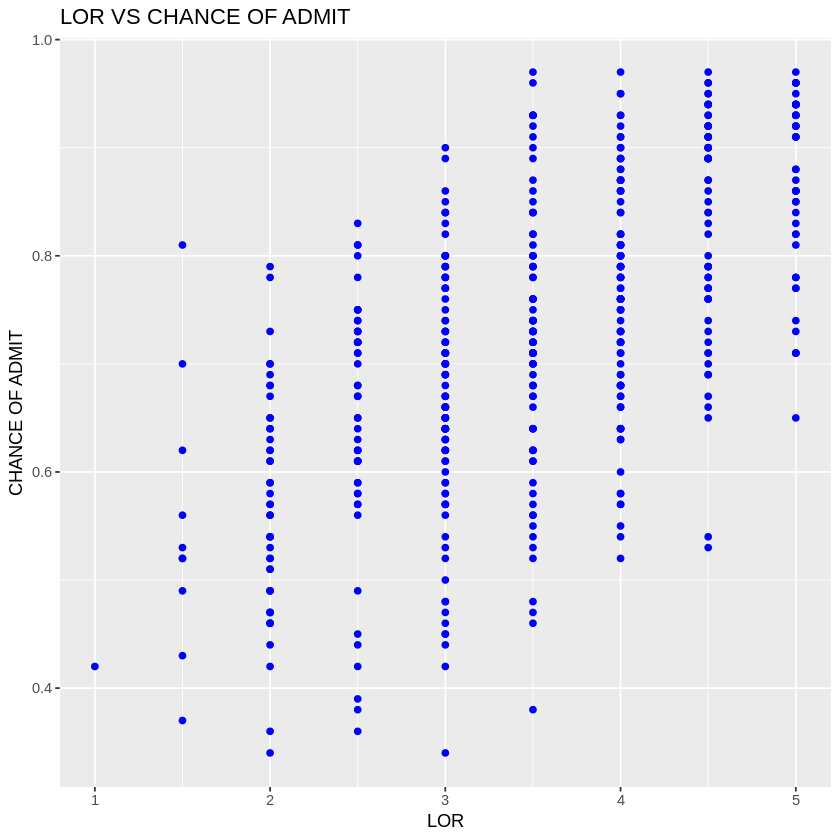

In [ ]:
# Scatter plot between two numeric variables "LOR VS CHANCE OF ADMIT"
ggplot(df1, aes(x = lor , y = chance.of.admit)) +
  geom_point(color = "blue") +
  labs(title = "LOR VS CHANCE OF ADMIT", x = "LOR", y = "CHANCE OF ADMIT")

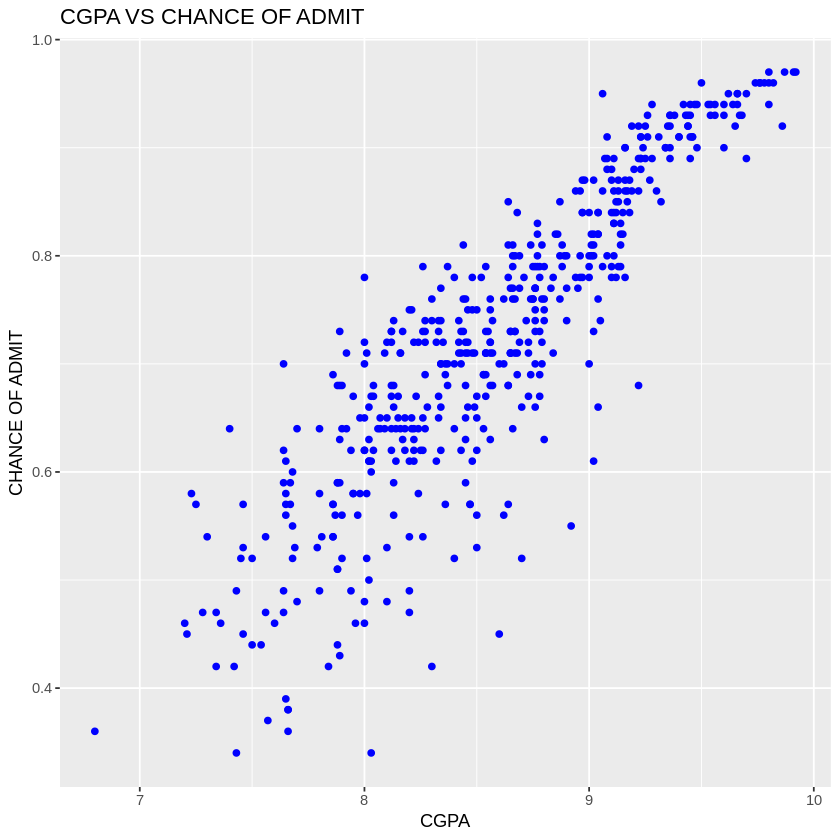

In [ ]:
# Scatter plot between two numeric variables "CGPA VS CHANCE OF ADMIT"
ggplot(df1, aes(x = cgpa, y = chance.of.admit)) +
  geom_point(color = "blue") +
  labs(title = "CGPA VS CHANCE OF ADMIT", x = "CGPA", y = "CHANCE OF ADMIT")

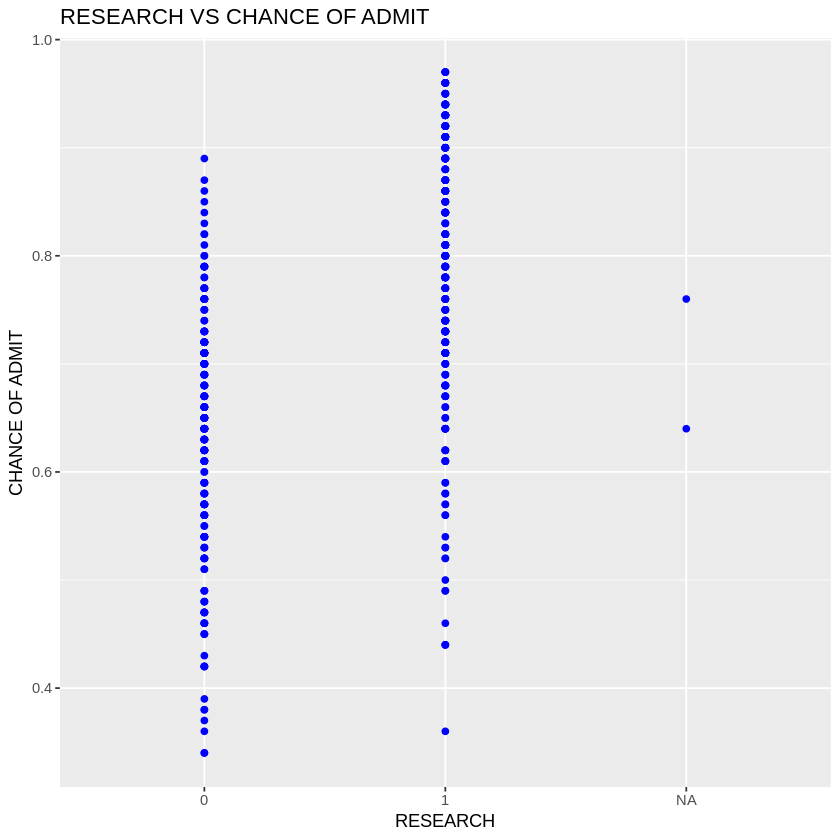

In [ ]:
# Scatter plot between two numeric variables "RESEARCH VS CHANCE OF ADMIT"
ggplot(df1, aes(x = research, y = chance.of.admit)) +
  geom_point(color = "blue") +
  labs(title = "RESEARCH VS CHANCE OF ADMIT", x = "RESEARCH", y = "CHANCE OF ADMIT")

In [ ]:
create_data_partition <- function(y, p = 0.8, list = FALSE) {
  n <- length(y)
  train_size <- floor(n * p)
  train_index <- sample(1:n, train_size, replace = FALSE) # Randomly select indices

  if (list) {
    return(train_index) # Return as a list
  } else {
    train_index_logical <- rep(FALSE, n) # Initialize as FALSE
    train_index_logical[train_index] <- TRUE # Set selected indices to TRUE
    return(train_index_logical) # Return as a logical vector
  }
}


train_index <- create_data_partition(df1$chance.of.admit, p = 0.8, list = FALSE)
train_data <- df1[train_index, ]
test_data <- df1[!train_index, ]
test_data
train_data

,gre.score,toefl.score,university.rating,sop,lor,cgpa,research,chance.of.admit
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
5,314,103,2,2.0,3.0,8.21,0,0.65
9,323,108,3,3.5,3.0,8.60,0,0.45
14,311,104,3,3.5,2.0,8.20,1,0.61
16,319,106,3,4.0,3.0,8.00,1,0.65
21,334,119,5,5.0,4.5,9.70,1,0.95
26,295,93,1,2.0,2.0,7.20,0,0.46
31,331,112,5,4.0,5.0,9.80,1,0.94
34,300,105,1,1.0,2.0,7.80,0,0.58
35,304,105,1,3.0,1.5,7.50,0,0.52


,gre.score,toefl.score,university.rating,sop,lor,cgpa,research,chance.of.admit
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
6,330,115,5,4.5,3.0,9.34,1,0.90
7,321,109,3,3.0,4.0,8.20,1,0.75
8,308,101,2,3.0,4.0,7.90,0,0.68
10,325,106,3,3.5,4.0,8.40,1,0.52
11,327,111,4,4.0,4.5,9.00,1,0.84


In [ ]:
# Load necessary library if not already loaded
#library(caret)
if(!require(caret)) install.packages("caret")
library(caret)
# Set seed for reproducibility
set.seed(123)

# Create data partition
trainIndex <- createDataPartition(df1$chance.of.admit, p = 0.8, list = FALSE)

# Split data into training and testing sets
train_data <- df1[trainIndex, ]
test_data <- df1[-trainIndex, ]

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
# Fit a linear regression model (predicting 'chance of admit' using CGPA )

lm_model1 <- lm(chance.of.admit ~ cgpa, data = train_data)
summary(lm_model1)

ERROR: Error in eval(mf, parent.frame()): object 'train_data' not found


In [ ]:
# Fit a linear regression model (predicting 'chance of admit' using CGPA and GRE )

lm_model2 <- lm(chance.of.admit ~ cgpa +gre.score, data = train_data)
summary(lm_model2)


Call:
lm(formula = chance.of.admit ~ cgpa + gre.score, data = train_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.298218 -0.023291  0.007058  0.037168  0.134534 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.6640887  0.1009851 -16.479  < 2e-16 ***
cgpa         0.1527655  0.0091988  16.607  < 2e-16 ***
gre.score    0.0034010  0.0004928   6.901 2.09e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06224 on 391 degrees of freedom
Multiple R-squared:  0.8061,	Adjusted R-squared:  0.8051 
F-statistic: 812.9 on 2 and 391 DF,  p-value: < 2.2e-16


In [ ]:
# Fit a linear regression model (predicting 'chance of admit' using  cgpa,gre,toffel)
lm_model3 <- lm(chance.of.admit ~ gre.score + toefl.score  + cgpa , data = train_data)
summary(lm_model3)


Call:
lm(formula = chance.of.admit ~ gre.score + toefl.score + cgpa, 
    data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29466 -0.02052  0.00784  0.03669  0.12950 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.6307574  0.1000187 -16.305  < 2e-16 ***
gre.score    0.0025135  0.0005481   4.586  6.1e-06 ***
toefl.score  0.0034436  0.0009842   3.499 0.000521 ***
cgpa         0.1385632  0.0099363  13.945  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06137 on 390 degrees of freedom
Multiple R-squared:  0.812,	Adjusted R-squared:  0.8106 
F-statistic: 561.6 on 3 and 390 DF,  p-value: < 2.2e-16


In [ ]:
# Fit a linear regression model (predicting 'chance of admit' using  cgpa,gre,toffel,university rating,)
lm_model4 <- lm(chance.of.admit ~ gre.score + toefl.score + university.rating  + cgpa , data = train_data)
summary(lm_model4)


Call:
lm(formula = chance.of.admit ~ gre.score + toefl.score + university.rating + 
    cgpa, data = train_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.292989 -0.021263  0.006261  0.037109  0.135916 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.5447778  0.1067083 -14.477  < 2e-16 ***
gre.score          0.0024739  0.0005456   4.534 7.71e-06 ***
toefl.score        0.0032037  0.0009851   3.252  0.00125 ** 
university.rating  0.0086616  0.0038808   2.232  0.02619 *  
cgpa               0.1298489  0.0106291  12.216  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06106 on 389 degrees of freedom
Multiple R-squared:  0.8144,	Adjusted R-squared:  0.8125 
F-statistic: 426.7 on 4 and 389 DF,  p-value: < 2.2e-16


In [ ]:
# Fit a linear regression model (predicting 'chance of admit' using cgpa,gre,toffel,university rating,sop)
lm_model5 <- lm(chance.of.admit ~ gre.score + toefl.score + university.rating + sop + cgpa , data = train_data)
summary(lm_model5)


Call:
lm(formula = chance.of.admit ~ gre.score + toefl.score + university.rating + 
    sop + cgpa, data = train_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.294078 -0.021636  0.006242  0.036528  0.131387 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.5228401  0.1079873 -14.102  < 2e-16 ***
gre.score          0.0025051  0.0005457   4.591 5.98e-06 ***
toefl.score        0.0030717  0.0009897   3.104  0.00205 ** 
university.rating  0.0063697  0.0042705   1.492  0.13663    
sop                0.0062953  0.0049147   1.281  0.20099    
cgpa               0.1261498  0.0110060  11.462  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06101 on 388 degrees of freedom
Multiple R-squared:  0.8152,	Adjusted R-squared:  0.8128 
F-statistic: 342.3 on 5 and 388 DF,  p-value: < 2.2e-16


In [ ]:
 # Fit a linear regression model (predicting 'chance of admit' using cgpa,gre,toffel,university rating,sop,lor)
lm_model6 <- lm(chance.of.admit ~ gre.score + toefl.score + university.rating + sop + cgpa + lor , data = train_data)
summary(lm_model6)

ERROR: Error in eval(mf, parent.frame()): object 'train_data' not found


In [ ]:
# Fit a linear regression model (predicting 'chance of admit' using all other variable)
lm_model <- lm(chance.of.admit ~ gre.score + toefl.score + university.rating + sop + lor + cgpa + research, data = train_data)
summary(lm_model)


Call:
lm(formula = chance.of.admit ~ gre.score + toefl.score + university.rating + 
    sop + lor + cgpa + research, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23346 -0.02302  0.00848  0.03246  0.15700 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.2894032  0.1169750 -11.023  < 2e-16 ***
gre.score          0.0020874  0.0005561   3.754 0.000201 ***
toefl.score        0.0024322  0.0009863   2.466 0.014099 *  
university.rating  0.0055962  0.0043104   1.298 0.194961    
sop                0.0047187  0.0052255   0.903 0.367085    
lor                0.0147634  0.0047189   3.129 0.001890 ** 
cgpa               0.1155809  0.0108642  10.639  < 2e-16 ***
research1          0.0259103  0.0074577   3.474 0.000570 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05996 on 385 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.

In [ ]:
# Make predictions on test data
predictions <- predict(lm_model, newdata = test_data)
predictions

5         9        14        16        21        26        31        34 
0.6303840 0.7190819 0.6492193 0.6647892 0.9622617 0.4293059 0.9531954 0.5335588 
       35        51        53        63        64        69        70        74 
0.5092897 0.6575327 0.5441021 0.7882092 0.7343572 0.8941549 0.8021398 0.5846306 
       75        88        90        93        97       100       115       119 
0.5117803 0.5480448 0.5811424 0.5868352 0.6230307 0.8129945 0.7875670 0.6512324 
      122       123       125       128       131       132       134       137 
0.8427308 0.7396033 0.9246705 0.6965130 0.7686464 0.6884642 0.8253132 0.8824461 
      139       143       149       155       163       165       168       173 
0.9873087 0.8224344 0.7436139 0.5290532        NA 0.5901689 0.8465094 0.7738341 
      179       192       193       203       207       210       219       223 
0.7453989 0.6216655 0.6428971 0.6509898 0.8501447 0.9181988 0.6796744 0.6872985 
      233       234       237       240       243       244       246       247 
0.8857400 0.6559375 0.6173072 0.6976888 0.6675019 0.7979142 0.7157929 0.7184982 
      251       253       255       257       258       270       271       272 
0.6940654 0.7641314 0.9087943 0.6422093 0.6782299 0.5821459 0.7893784 0.9083365 
      274       276       283       287       288       304       306       310 
0.6623228 0.7294560 0.8575670 0.5423084 0.5483854 0.6880303 0.7502051 0.6266976 
      311       318       356       358       370       375       387       390 
0.6064700 0.6641703 0.7842785 0.9115817 0.5652287 0.6624944 0.7024818 0.8627072 
      391       395       399       403       404       405       410       411 
0.8101812 0.9377089 0.8672144 0.6082677 0.5738905 0.5540617 0.7371462 0.7959150 
      422       427       431       443       452       462       468       471 
0.7149565 0.7710489 0.5806763 0.8110218 0.5388719 0.7470830 0.9046109 0.5634473 
      472       476       487 
0.5947324 0.7245455 0.5936267

In [ ]:
# Model performance (R-squared)
r_squared <- summary(lm_model)$r.squared
cat("R-squared: ", r_squared, "\n")

ERROR: Error: object 'lm_model' not found


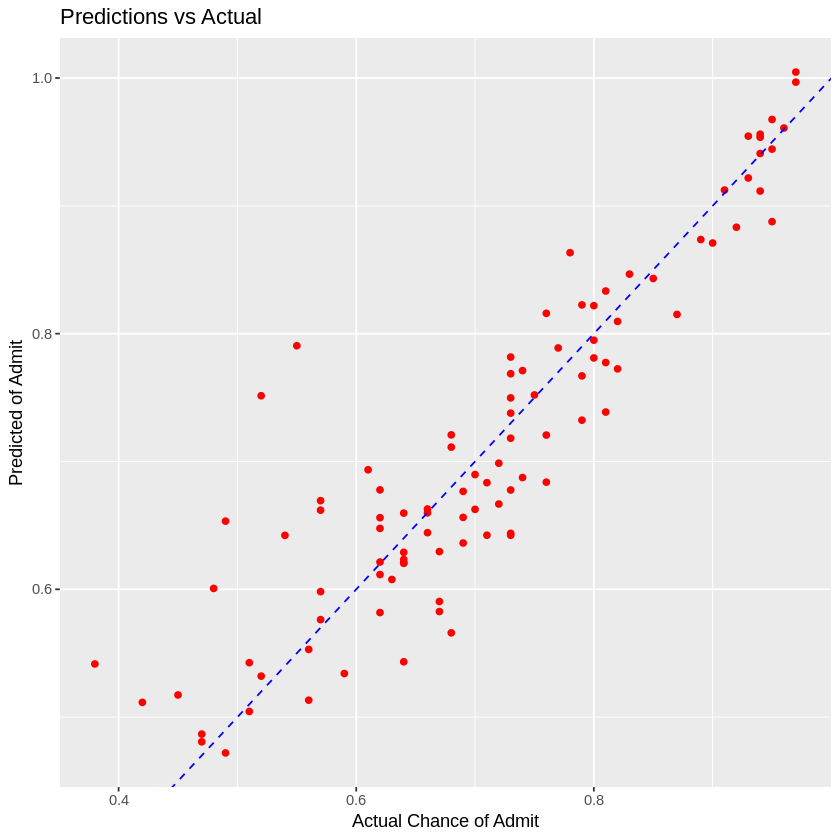

In [ ]:

# Plot predictions vs actual
ggplot(test_data, aes(x = chance.of.admit, y = predictions)) +
  geom_point(color = "red") +
  geom_abline(slope = 1, intercept = 0, color = "blue", linetype = "dashed") +
  labs(title = "Predictions vs Actual", x = "Actual Chance of Admit", y = "Predicted of Admit")


In [ ]:
# HYPOTHESIS TESTING
# Testing if the mean of chance.of.admit is different from a value (e.g., 0.7)
t_test <- t.test(df1$chance.of.admit, mu = 0.7)
print(t_test)

# Interpret the p-value
if (t_test$p.value < 0.05) {
  cat("Reject the null hypothesis: Mean chance.of.admit is significantly different from 0.7.\n")
} else {
  cat("Fail to reject the null hypothesis: No significant difference from 0.7.\n")
}


	One Sample t-test

data:  df1$chance.of.admit
t = 3.3626, df = 492, p-value = 0.0008322
alternative hypothesis: true mean is not equal to 0.7
95 percent confidence interval:
 0.7088451 0.7337107
sample estimates:
mean of x 
0.7212779 

Reject the null hypothesis: Mean chance.of.admit is significantly different from 0.7.


In [ ]:
#HYPOTHESIS Testing
# Calculate the standard deviation of the "chance.of.admit" column
std_dev <- sd(df1$chance.of.admit)

# Print the result
print(std_dev)


# Sample data
sample_mean <- mean(df1$chance.of.admit)  # Mean of chance.of.admit from the dataset
n <- length(df1$chance.of.admit)          # Sample size

# Hypothesized population mean
mu <- 0.7  # Hypothesized mean value

# Step 1: Calculate the Z-statistic
z_stat <- (sample_mean - mu) / (std_dev/ sqrt(n))
z_stat

# Step 2: Calculate the p-value
p_value <- 2 * pnorm(-abs(z_stat))  # Two-tailed Z-test
p_value

# Step 3: Interpret the result
if (p_value < 0.05) {
  cat("Reject the null hypothesis: Mean chance.of.admit is significantly different from 0.7.\n")
} else {
  cat("Fail to reject the null hypothesis: No significant difference from 0.7.\n")
}

# Output the Z-statistic and p-value
z_stat
p_value

[1] 0.1404992


[1] 3.362623

[1] 0.0007720585

Reject the null hypothesis: Mean chance.of.admit is significantly different from 0.7.


[1] 3.362623

[1] 0.0007720585

In [ ]:
# Install necessary packages if not already installed
install.packages(c("miceadds", "sandwich", "lmtest"))

# Load necessary libraries
library(miceadds)
library(sandwich)
library(lmtest)

# Assuming 'df1' is your data frame and 'cluster_var' is the clustering variable
# Fit the linear model
lm_model <- lm(chance.of.admit ~ gre.score + toefl.score + university.rating +
                 sop + lor + cgpa + research, data = df1)

# Calculate clustered standard errors
# Replace "cluster_var" with the actual name of your clustering variable
clustered_se <- lm.cluster(df1, formula(lm_model), cluster = "cluster_var")

# Obtain clustered standard errors and p-values
coeftest(lm_model, vcov = clustered_se$vcov)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘ucminf’, ‘numDeriv’, ‘iterators’, ‘lme4’, ‘ordinal’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘pan’, ‘jomo’, ‘glmnet’, ‘mitml’, ‘mice’, ‘mitools’, ‘RcppArmadillo’, ‘zoo’


Warning message in install.packages(c("miceadds", "sandwich", "lmtest")):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages(c("miceadds", "sandwich", "lmtest")):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages(c("miceadds", "sandwich", "lmtest")):
“installation of package ‘jomo’ had non-zero exit status”
Warning message in install.packages(c("miceadds", "sandwich", "lmtest")):
“installation of package ‘mitml’ had non-zero exit status”
Warning message in install.packages(c("miceadds", "sandwich", "lmtest")):
“installation of package ‘mice’ had non-zero exit status”
Warning message in install.packages(

ERROR: Error in library(miceadds): there is no package called ‘miceadds’


In [ ]:
#implemented in r studio due to unavailability of some libraries in colab
# specifying the path & reading contents of csv file into dataframe
df<-read.csv("~/33.csv" )
df=data.frame(df)
# print contents of the csv file
print (df)
# View the first few rows and structure of the data
head(df)
str(df)

##


# Load the required libraries
#install.packages("caret")
install.packages("corrplot")
library(readr)
library(dplyr)
library(ggplot2)
library(corrplot)
library(caret)

##


# DATA CLEANING
# Step1:Remove missing values (if any)
df1= na.omit(df)
# Rename columns readability
colnames(df1) <- tolower(colnames(df1))
#converting relevant columns to factors (if categorical variables exist)
df1$research <- factor(df1$research,levels = c("Absent", "Present"),
                       labels = c(0, 1))

# Check for duplicates and remove them (if necessary)
df1 <- df1 %>% distinct()

#Remove unique row identifier
df1 <- df1[, -1]
df1
str(df1)
print(df1)

##

create_data_partition <- function(y, p = 0.8, list = FALSE) {
  n <- length(y)
  train_size <- floor(n * p)
  train_index <- sample(1:n, train_size, replace = FALSE) # Randomly select indices

  if (list) {
    return(train_index) # Return as a list
  } else {
    train_index_logical <- rep(FALSE, n) # Initialize as FALSE
    train_index_logical[train_index] <- TRUE # Set selected indices to TRUE
    return(train_index_logical) # Return as a logical vector
  }
}


train_index <- create_data_partition(df1$chance.of.admit, p = 0.8, list = FALSE)
train_data <- df1[train_index, ]
test_data <- df1[!train_index, ]
test_data
train_data

##

# Fit a linear regression model (predicting 'chance of admit' using all other variable)
lm_model <- lm(chance.of.admit ~ gre.score + toefl.score + university.rating + sop + lor + cgpa + research, data = train_data)
summary(lm_model)

##

# Model performance (R-squared)
r_squared <- summary(lm_model)$r.squared
cat("R-squared: ", r_squared, "\n")


# K-means clustering



# Remove the column that you don't want to cluster on (e.g., car names)

numeric_cols <- df1 %>% select_if(is.numeric)
df1 <- scale(numeric_cols)  # Normalize the data

# Perform K-means clustering
set.seed(123)  # For reproducibility
kmeans_result <- kmeans(df1, centers = 3)  # k = 3 clusters

# View the clustering result
print(kmeans_result$cluster)

# Add the cluster assignments to the dataset
data_with_clusters <- as.data.frame(df1)
data_with_clusters$cluster <- factor(kmeans_result$cluster)

# Visualize clusters using ggplot2
ggplot(data_with_clusters, aes(x = cgpa, y = chance.of.admit, color = cluster)) +
  geom_point(size = 3) +
  labs(title = "K-Means Clustering Results")

ggplot(data_with_clusters, aes(x = toefl.score, y = chance.of.admit, color = cluster)) +
  geom_point(size = 3) +
  labs(title = "K-Means Clustering Results")

ggplot(data_with_clusters, aes(x = university.rating, y = chance.of.admit, color = cluster)) +
  geom_point(size = 3) +
  labs(title = "K-Means Clustering Results")

ggplot(data_with_clusters, aes(x = sop, y = chance.of.admit, color = cluster)) +
  geom_point(size = 3) +
  labs(title = "K-Means Clustering Results")

ggplot(data_with_clusters, aes(x = lor , y = chance.of.admit, color = cluster)) +
  geom_point(size = 3) +
  labs(title = "K-Means Clustering Results")

ggplot(data_with_clusters, aes(x = gre.score, y = chance.of.admit, color = cluster)) +
  geom_point(size = 3) +
  labs(title = "K-Means Clustering Results")


output



```
> # specifying the path & reading contents of csv file into dataframe
> df<-read.csv("~/33.csv" )
> df=data.frame(df)
> # print contents of the csv file
> print (df)
    Serial.No. GRE.Score TOEFL.Score University.Rating SOP LOR CGPA Research Chance.of.Admit
1            1       337         118                 4 4.5 4.5 9.65  Present            0.92
2            2       324         107                 4 4.0 4.5 8.87  Present            0.76
3            3       316         104                 3 3.0 3.5 8.00  Present            0.72
4            4       322         110                 3 3.5 2.5 8.67  Present            0.80
5            5       314         103                 2 2.0 3.0 8.21   Absent            0.65
6            6       330         115                 5 4.5 3.0 9.34  Present            0.90
7            7       321         109                 3 3.0 4.0 8.20  Present            0.75
8            8       308         101                 2 3.0 4.0 7.90   Absent            0.68
9            9        NA         102                 1 2.0 1.5 8.00   Absent            0.50
10          10       323         108                 3 3.5 3.0 8.60   Absent            0.45
11          11       325         106                 3 3.5 4.0 8.40  Present            0.52
12          12       327         111                 4 4.0 4.5 9.00  Present            0.84
13          13       328         112                 4 4.0 4.5 9.10  Present            0.78
14          14       307         109                 3 4.0 3.0 8.00  Present            0.62
15          15       311         104                 3 3.5 2.0 8.20  Present            0.61
16          16       314          NA                 3 3.5 2.5 8.30   Absent            0.54
17          17       317         107                 3 4.0 3.0 8.70   Absent            0.66
18          18       319         106                 3 4.0 3.0 8.00  Present            0.65
19          19       318         110                 3 4.0 3.0 8.80   Absent            0.63
20          20       303         102                 3 3.5 3.0 8.50   Absent            0.62
21          21       312         107                 3 3.0 2.0 7.90  Present            0.64
22          22       325         114                 4 3.0 2.0 8.40   Absent            0.70
23          23       328         116                 5  NA 5.0 9.50  Present            0.94
24          24       334         119                 5 5.0 4.5 9.70  Present            0.95
25          25       336         119                 5 4.0 3.5 9.80  Present            0.97
26          26       340         120                 5 4.5 4.5 9.60  Present            0.94
27          27       322         109                 5 4.5 3.5 8.80   Absent            0.76
28          28       298          98                 2 1.5 2.5 7.50  Present            0.44
29          29       295          93                 1 2.0 2.0 7.20   Absent            0.46
30          30       310          99                 2 1.5 2.0 7.30   Absent            0.54
31          31       300          97                 2 3.0  NA 8.10  Present            0.65
32          32       327         103                 3 4.0 4.0 8.30  Present            0.74
33          33       338         118                 4 3.0 4.5 9.40  Present            0.91
34          34       340         114                 5 4.0 4.0 9.60  Present            0.90
35          35       331         112                 5 4.0 5.0 9.80  Present            0.94
36          36       320         110                 5 5.0 5.0 9.20  Present            0.88
37          37       299         106                 2 4.0 4.0 8.40   Absent            0.64
38          38       300         105                 1 1.0 2.0 7.80   Absent            0.58
39          39       304         105                 1 3.0 1.5 7.50   Absent            0.52
40          40       307         108                 2 4.0 3.5 7.70   Absent            0.48
41          41       308         110                 3 3.5 3.0 8.00  Present            0.46
42          42       316         105                 2 2.5 2.5 8.20  Present            0.49
43          43       313         107                 2 2.5 2.0 8.50  Present            0.53
44          44       332         117                 4 4.5 4.0 9.10   Absent            0.87
45          45       326         113                 5 4.5 4.0 9.40  Present            0.91
46          46       322         110                 5 5.0 4.0 9.10  Present            0.88
47          47       329         114                 5 4.0 5.0 9.30  Present            0.86
48          48       339         119                 5 4.5 4.0 9.70   Absent            0.89
49          49       321         110                 3 3.5 5.0 8.85  Present            0.82
50          50       327         111                 4 3.0 4.0 8.40  Present            0.78
51          51       313          98                 3 2.5 4.5 8.30  Present            0.76
52          52       312         100                 2 1.5 3.5 7.90  Present            0.56
53          53       334         116                 4 4.0 3.0 8.00  Present            0.78
54          54       324         112                 4 4.0 2.5 8.10  Present            0.72
55          55       322         110                 3 3.0 3.5 8.00   Absent            0.70
56          56       320         103                 3 3.0 3.0 7.70   Absent            0.64
57          57       316         102                 3 2.0 3.0 7.40   Absent            0.64
58          58       298          99                 2 4.0 2.0 7.60   Absent            0.46
59          59       300          99                 1 3.0 2.0 6.80  Present            0.36
60          60       311         104                 2 2.0 2.0 8.30   Absent            0.42
61          61       309         100                 2 3.0 3.0 8.10   Absent            0.48
62          62       307         101                 3 4.0 3.0 8.20   Absent            0.47
63          63       304         105                 2 3.0 3.0 8.20  Present            0.54
64          64       315         107                 2 4.0 3.0 8.50  Present            0.56
65          65       325         111                 3 3.0 3.5 8.70   Absent            0.52
66          66       325         112                 4 3.5 3.5 8.92   Absent            0.55
67          67       327         114                 3 3.0 3.0 9.02   Absent            0.61
68          68       316         107                 2 3.5 3.5 8.64  Present            0.57
69          69       318         109                 3 3.5 4.0 9.22  Present            0.68
70          70       328         115                 4 4.5 4.0 9.16  Present            0.78
71          71       332         118                 5 5.0 5.0 9.64  Present            0.94
72          72       336         112                 5 5.0 5.0 9.76  Present            0.96
73          73       321         111                 5 5.0 5.0 9.45  Present            0.93
74          74       314         108                 4 4.5 4.0 9.04  Present            0.84
75          75       314         106                 3 3.0 5.0 8.90   Absent            0.74
76          76       329         114                 2 2.0 4.0 8.56  Present            0.72
77          77       327         112                 3 3.0 3.0 8.72  Present            0.74
78          78       301          99                 2 3.0 2.0 8.22   Absent            0.64
79          79       296          95                 2 3.0 2.0 7.54  Present            0.44
80          80       294          93                 1 1.5 2.0 7.36   Absent            0.46
81          81       312         105                 3 2.0 3.0 8.02  Present            0.50
82          82       340         120                 4 5.0 5.0 9.50  Present            0.96
83          83       320         110                 5 5.0 4.5 9.22  Present            0.92
84          84       322         115                 5 4.0 4.5 9.36  Present            0.92
85          85       340         115                 5 4.5 4.5 9.45  Present            0.94
86          86       319         103                 4 4.5 3.5 8.66   Absent            0.76
87          87       315         106                 3 4.5 3.5 8.42   Absent            0.72
88          88       317         107                 2 3.5 3.0 8.28   Absent            0.66
89          89       314         108                 3 4.5 3.5 8.14   Absent            0.64
90          90       316         109                 4 4.5 3.5 8.76  Present            0.74
91          91       318         106                 2 4.0 4.0 7.92  Present            0.64
92          92       299          97                 3 5.0 3.5 7.66   Absent            0.38
93          93       298          98                 2 4.0 3.0 8.03   Absent            0.34
94          94       301          97                 2 3.0 3.0 7.88  Present            0.44
95          95       303          99                 3 2.0 2.5 7.66   Absent            0.36
96          96       304         100                 4 1.5 2.5 7.84   Absent            0.42
97          97       306         100                 2 3.0 3.0 8.00   Absent            0.48
98          98       331         120                 3 4.0 4.0 8.96  Present            0.86
99          99       332         119                NA 5.0 4.5 9.24  Present            0.90
100        100       323         113                 3 4.0 4.0 8.88  Present            0.79
101        101       322         107                 3 3.5 3.5 8.46  Present            0.71
102        102       312         105                 2 2.5 3.0 8.12   Absent            0.64
103        103       314         106                 2 4.0 3.5 8.25   Absent            0.62
104        104       317         104                 2 4.5 4.0 8.47   Absent            0.57
105        105       326         112                 3 3.5 3.0 9.05  Present            0.74
106        106       316         110                 3 4.0 4.5 8.78  Present            0.69
107        107       329         111                 4 4.5 4.5 9.18  Present            0.87
108        108       338         117                 4 3.5 4.5 9.46  Present            0.91
109        109       331         116                 5 5.0 5.0 9.38  Present            0.93
110        110       304         103                 5 5.0 4.0 8.64   Absent            0.68
111        111       305         108                 5 3.0 3.0 8.48   Absent            0.61
 [ reached 'max' / getOption("max.print") -- omitted 389 rows ]
> # View the first few rows and structure of the data
> head(df)
  Serial.No. GRE.Score TOEFL.Score University.Rating SOP LOR CGPA Research Chance.of.Admit
1          1       337         118                 4 4.5 4.5 9.65  Present            0.92
2          2       324         107                 4 4.0 4.5 8.87  Present            0.76
3          3       316         104                 3 3.0 3.5 8.00  Present            0.72
4          4       322         110                 3 3.5 2.5 8.67  Present            0.80
5          5       314         103                 2 2.0 3.0 8.21   Absent            0.65
6          6       330         115                 5 4.5 3.0 9.34  Present            0.90
> str(df)
'data.frame':	500 obs. of  9 variables:
 $ Serial.No.       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ GRE.Score        : int  337 324 316 322 314 330 321 308 NA 323 ...
 $ TOEFL.Score      : int  118 107 104 110 103 115 109 101 102 108 ...
 $ University.Rating: int  4 4 3 3 2 5 3 2 1 3 ...
 $ SOP              : num  4.5 4 3 3.5 2 4.5 3 3 2 3.5 ...
 $ LOR              : num  4.5 4.5 3.5 2.5 3 3 4 4 1.5 3 ...
 $ CGPA             : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8 8.6 ...
 $ Research         : chr  "Present" "Present" "Present" "Present" ...
 $ Chance.of.Admit  : num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.5 0.45 ...
> library(readr)
> library(caret)
Loading required package: ggplot2
Loading required package: lattice
> library(corrplot)
corrplot 0.95 loaded
> library(dplyr)

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

> # Load the required libraries
> #install.packages("caret")
> install.packages("corrplot")
Error in install.packages : Updating loaded packages
> library(readr)
> library(dplyr)
> library(ggplot2)
> library(corrplot)
> library(caret)
> install.packages("corrplot")
Warning in install.packages :
  package ‘corrplot’ is in use and will not be installed
> # DATA CLEANING
> # Step1:Remove missing values (if any)
> df1= na.omit(df)
> # Rename columns readability
> colnames(df1) <- tolower(colnames(df1))
> #converting relevant columns to factors (if categorical variables exist)
> df1$research <- factor(df1$research,levels = c("Absent", "Present"),
+                        labels = c(0, 1))
> df1 <- df1 %>% distinct()
> df1 <- df1[, -1]
> df1
    gre.score toefl.score university.rating sop lor cgpa research chance.of.admit
1         337         118                 4 4.5 4.5 9.65        1            0.92
2         324         107                 4 4.0 4.5 8.87        1            0.76
3         316         104                 3 3.0 3.5 8.00        1            0.72
4         322         110                 3 3.5 2.5 8.67        1            0.80
5         314         103                 2 2.0 3.0 8.21        0            0.65
6         330         115                 5 4.5 3.0 9.34        1            0.90
7         321         109                 3 3.0 4.0 8.20        1            0.75
8         308         101                 2 3.0 4.0 7.90        0            0.68
9         323         108                 3 3.5 3.0 8.60        0            0.45
10        325         106                 3 3.5 4.0 8.40        1            0.52
11        327         111                 4 4.0 4.5 9.00        1            0.84
12        328         112                 4 4.0 4.5 9.10        1            0.78
13        307         109                 3 4.0 3.0 8.00        1            0.62
14        311         104                 3 3.5 2.0 8.20        1            0.61
15        317         107                 3 4.0 3.0 8.70        0            0.66
16        319         106                 3 4.0 3.0 8.00        1            0.65
17        318         110                 3 4.0 3.0 8.80        0            0.63
18        303         102                 3 3.5 3.0 8.50        0            0.62
19        312         107                 3 3.0 2.0 7.90        1            0.64
20        325         114                 4 3.0 2.0 8.40        0            0.70
21        334         119                 5 5.0 4.5 9.70        1            0.95
22        336         119                 5 4.0 3.5 9.80        1            0.97
23        340         120                 5 4.5 4.5 9.60        1            0.94
24        322         109                 5 4.5 3.5 8.80        0            0.76
25        298          98                 2 1.5 2.5 7.50        1            0.44
26        295          93                 1 2.0 2.0 7.20        0            0.46
27        310          99                 2 1.5 2.0 7.30        0            0.54
28        327         103                 3 4.0 4.0 8.30        1            0.74
29        338         118                 4 3.0 4.5 9.40        1            0.91
30        340         114                 5 4.0 4.0 9.60        1            0.90
31        331         112                 5 4.0 5.0 9.80        1            0.94
32        320         110                 5 5.0 5.0 9.20        1            0.88
33        299         106                 2 4.0 4.0 8.40        0            0.64
34        300         105                 1 1.0 2.0 7.80        0            0.58
35        304         105                 1 3.0 1.5 7.50        0            0.52
36        307         108                 2 4.0 3.5 7.70        0            0.48
37        308         110                 3 3.5 3.0 8.00        1            0.46
38        316         105                 2 2.5 2.5 8.20        1            0.49
39        313         107                 2 2.5 2.0 8.50        1            0.53
40        332         117                 4 4.5 4.0 9.10        0            0.87
41        326         113                 5 4.5 4.0 9.40        1            0.91
42        322         110                 5 5.0 4.0 9.10        1            0.88
43        329         114                 5 4.0 5.0 9.30        1            0.86
44        339         119                 5 4.5 4.0 9.70        0            0.89
45        321         110                 3 3.5 5.0 8.85        1            0.82
46        327         111                 4 3.0 4.0 8.40        1            0.78
47        313          98                 3 2.5 4.5 8.30        1            0.76
48        312         100                 2 1.5 3.5 7.90        1            0.56
49        334         116                 4 4.0 3.0 8.00        1            0.78
50        324         112                 4 4.0 2.5 8.10        1            0.72
51        322         110                 3 3.0 3.5 8.00        0            0.70
52        320         103                 3 3.0 3.0 7.70        0            0.64
53        316         102                 3 2.0 3.0 7.40        0            0.64
54        298          99                 2 4.0 2.0 7.60        0            0.46
55        300          99                 1 3.0 2.0 6.80        1            0.36
56        311         104                 2 2.0 2.0 8.30        0            0.42
57        309         100                 2 3.0 3.0 8.10        0            0.48
58        307         101                 3 4.0 3.0 8.20        0            0.47
59        304         105                 2 3.0 3.0 8.20        1            0.54
60        315         107                 2 4.0 3.0 8.50        1            0.56
61        325         111                 3 3.0 3.5 8.70        0            0.52
62        325         112                 4 3.5 3.5 8.92        0            0.55
63        327         114                 3 3.0 3.0 9.02        0            0.61
64        316         107                 2 3.5 3.5 8.64        1            0.57
65        318         109                 3 3.5 4.0 9.22        1            0.68
66        328         115                 4 4.5 4.0 9.16        1            0.78
67        332         118                 5 5.0 5.0 9.64        1            0.94
68        336         112                 5 5.0 5.0 9.76        1            0.96
69        321         111                 5 5.0 5.0 9.45        1            0.93
70        314         108                 4 4.5 4.0 9.04        1            0.84
71        314         106                 3 3.0 5.0 8.90        0            0.74
72        329         114                 2 2.0 4.0 8.56        1            0.72
73        327         112                 3 3.0 3.0 8.72        1            0.74
74        301          99                 2 3.0 2.0 8.22        0            0.64
75        296          95                 2 3.0 2.0 7.54        1            0.44
76        294          93                 1 1.5 2.0 7.36        0            0.46
77        312         105                 3 2.0 3.0 8.02        1            0.50
78        340         120                 4 5.0 5.0 9.50        1            0.96
79        320         110                 5 5.0 4.5 9.22        1            0.92
80        322         115                 5 4.0 4.5 9.36        1            0.92
81        340         115                 5 4.5 4.5 9.45        1            0.94
82        319         103                 4 4.5 3.5 8.66        0            0.76
83        315         106                 3 4.5 3.5 8.42        0            0.72
84        317         107                 2 3.5 3.0 8.28        0            0.66
85        314         108                 3 4.5 3.5 8.14        0            0.64
86        316         109                 4 4.5 3.5 8.76        1            0.74
87        318         106                 2 4.0 4.0 7.92        1            0.64
88        299          97                 3 5.0 3.5 7.66        0            0.38
89        298          98                 2 4.0 3.0 8.03        0            0.34
90        301          97                 2 3.0 3.0 7.88        1            0.44
91        303          99                 3 2.0 2.5 7.66        0            0.36
92        304         100                 4 1.5 2.5 7.84        0            0.42
93        306         100                 2 3.0 3.0 8.00        0            0.48
94        331         120                 3 4.0 4.0 8.96        1            0.86
95        323         113                 3 4.0 4.0 8.88        1            0.79
96        322         107                 3 3.5 3.5 8.46        1            0.71
97        312         105                 2 2.5 3.0 8.12        0            0.64
98        314         106                 2 4.0 3.5 8.25        0            0.62
99        317         104                 2 4.5 4.0 8.47        0            0.57
100       326         112                 3 3.5 3.0 9.05        1            0.74
101       316         110                 3 4.0 4.5 8.78        1            0.69
102       329         111                 4 4.5 4.5 9.18        1            0.87
103       338         117                 4 3.5 4.5 9.46        1            0.91
104       331         116                 5 5.0 5.0 9.38        1            0.93
105       304         103                 5 5.0 4.0 8.64        0            0.68
106       305         108                 5 3.0 3.0 8.48        0            0.61
107       321         109                 4 4.0 4.0 8.68        1            0.69
108       301         107                 3 3.5 3.5 8.34        1            0.62
109       320         110                 2 4.0 3.5 8.56        0            0.72
110       311         105                 3 3.5 3.0 8.45        1            0.59
111       310         106                 4 4.5 4.5 9.04        1            0.66
112       299         102                 3 4.0 3.5 8.62        0            0.56
113       290         104                 4 2.0 2.5 7.46        0            0.45
114       296          99                 2 3.0 3.5 7.28        0            0.47
115       327         104                 5 3.0 3.5 8.84        1            0.71
116       335         117                 5 5.0 5.0 9.56        1            0.94
117       334         119                 5 4.5 4.5 9.48        1            0.94
118       310         106                 4 1.5 2.5 8.36        0            0.57
119       308         108                 3 3.5 3.5 8.22        0            0.61
120       301         106                 4 2.5 3.0 8.47        0            0.57
121       300         100                 3 2.0 3.0 8.66        1            0.64
122       323         113                 3 4.0 3.0 9.32        1            0.85
123       319         112                 3 2.5 2.0 8.71        1            0.78
124       326         112                 3 3.5 3.0 9.10        1            0.84
125       333         118                 5 5.0 5.0 9.35        1            0.92
 [ reached 'max' / getOption("max.print") -- omitted 368 rows ]
> str(df1)
'data.frame':	493 obs. of  8 variables:
 $ gre.score        : int  337 324 316 322 314 330 321 308 323 325 ...
 $ toefl.score      : int  118 107 104 110 103 115 109 101 108 106 ...
 $ university.rating: int  4 4 3 3 2 5 3 2 3 3 ...
 $ sop              : num  4.5 4 3 3.5 2 4.5 3 3 3.5 3.5 ...
 $ lor              : num  4.5 4.5 3.5 2.5 3 3 4 4 3 4 ...
 $ cgpa             : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8.6 8.4 ...
 $ research         : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 1 1 2 ...
 $ chance.of.admit  : num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.45 0.52 ...
> print(df1)
    gre.score toefl.score university.rating sop lor cgpa research chance.of.admit
1         337         118                 4 4.5 4.5 9.65        1            0.92
2         324         107                 4 4.0 4.5 8.87        1            0.76
3         316         104                 3 3.0 3.5 8.00        1            0.72
4         322         110                 3 3.5 2.5 8.67        1            0.80
5         314         103                 2 2.0 3.0 8.21        0            0.65
6         330         115                 5 4.5 3.0 9.34        1            0.90
7         321         109                 3 3.0 4.0 8.20        1            0.75
8         308         101                 2 3.0 4.0 7.90        0            0.68
9         323         108                 3 3.5 3.0 8.60        0            0.45
10        325         106                 3 3.5 4.0 8.40        1            0.52
11        327         111                 4 4.0 4.5 9.00        1            0.84
12        328         112                 4 4.0 4.5 9.10        1            0.78
13        307         109                 3 4.0 3.0 8.00        1            0.62
14        311         104                 3 3.5 2.0 8.20        1            0.61
15        317         107                 3 4.0 3.0 8.70        0            0.66
16        319         106                 3 4.0 3.0 8.00        1            0.65
17        318         110                 3 4.0 3.0 8.80        0            0.63
18        303         102                 3 3.5 3.0 8.50        0            0.62
19        312         107                 3 3.0 2.0 7.90        1            0.64
20        325         114                 4 3.0 2.0 8.40        0            0.70
21        334         119                 5 5.0 4.5 9.70        1            0.95
22        336         119                 5 4.0 3.5 9.80        1            0.97
23        340         120                 5 4.5 4.5 9.60        1            0.94
24        322         109                 5 4.5 3.5 8.80        0            0.76
25        298          98                 2 1.5 2.5 7.50        1            0.44
26        295          93                 1 2.0 2.0 7.20        0            0.46
27        310          99                 2 1.5 2.0 7.30        0            0.54
28        327         103                 3 4.0 4.0 8.30        1            0.74
29        338         118                 4 3.0 4.5 9.40        1            0.91
30        340         114                 5 4.0 4.0 9.60        1            0.90
31        331         112                 5 4.0 5.0 9.80        1            0.94
32        320         110                 5 5.0 5.0 9.20        1            0.88
33        299         106                 2 4.0 4.0 8.40        0            0.64
34        300         105                 1 1.0 2.0 7.80        0            0.58
35        304         105                 1 3.0 1.5 7.50        0            0.52
36        307         108                 2 4.0 3.5 7.70        0            0.48
37        308         110                 3 3.5 3.0 8.00        1            0.46
38        316         105                 2 2.5 2.5 8.20        1            0.49
39        313         107                 2 2.5 2.0 8.50        1            0.53
40        332         117                 4 4.5 4.0 9.10        0            0.87
41        326         113                 5 4.5 4.0 9.40        1            0.91
42        322         110                 5 5.0 4.0 9.10        1            0.88
43        329         114                 5 4.0 5.0 9.30        1            0.86
44        339         119                 5 4.5 4.0 9.70        0            0.89
45        321         110                 3 3.5 5.0 8.85        1            0.82
46        327         111                 4 3.0 4.0 8.40        1            0.78
47        313          98                 3 2.5 4.5 8.30        1            0.76
48        312         100                 2 1.5 3.5 7.90        1            0.56
49        334         116                 4 4.0 3.0 8.00        1            0.78
50        324         112                 4 4.0 2.5 8.10        1            0.72
51        322         110                 3 3.0 3.5 8.00        0            0.70
52        320         103                 3 3.0 3.0 7.70        0            0.64
53        316         102                 3 2.0 3.0 7.40        0            0.64
54        298          99                 2 4.0 2.0 7.60        0            0.46
55        300          99                 1 3.0 2.0 6.80        1            0.36
56        311         104                 2 2.0 2.0 8.30        0            0.42
57        309         100                 2 3.0 3.0 8.10        0            0.48
58        307         101                 3 4.0 3.0 8.20        0            0.47
59        304         105                 2 3.0 3.0 8.20        1            0.54
60        315         107                 2 4.0 3.0 8.50        1            0.56
61        325         111                 3 3.0 3.5 8.70        0            0.52
62        325         112                 4 3.5 3.5 8.92        0            0.55
63        327         114                 3 3.0 3.0 9.02        0            0.61
64        316         107                 2 3.5 3.5 8.64        1            0.57
65        318         109                 3 3.5 4.0 9.22        1            0.68
66        328         115                 4 4.5 4.0 9.16        1            0.78
67        332         118                 5 5.0 5.0 9.64        1            0.94
68        336         112                 5 5.0 5.0 9.76        1            0.96
69        321         111                 5 5.0 5.0 9.45        1            0.93
70        314         108                 4 4.5 4.0 9.04        1            0.84
71        314         106                 3 3.0 5.0 8.90        0            0.74
72        329         114                 2 2.0 4.0 8.56        1            0.72
73        327         112                 3 3.0 3.0 8.72        1            0.74
74        301          99                 2 3.0 2.0 8.22        0            0.64
75        296          95                 2 3.0 2.0 7.54        1            0.44
76        294          93                 1 1.5 2.0 7.36        0            0.46
77        312         105                 3 2.0 3.0 8.02        1            0.50
78        340         120                 4 5.0 5.0 9.50        1            0.96
79        320         110                 5 5.0 4.5 9.22        1            0.92
80        322         115                 5 4.0 4.5 9.36        1            0.92
81        340         115                 5 4.5 4.5 9.45        1            0.94
82        319         103                 4 4.5 3.5 8.66        0            0.76
83        315         106                 3 4.5 3.5 8.42        0            0.72
84        317         107                 2 3.5 3.0 8.28        0            0.66
85        314         108                 3 4.5 3.5 8.14        0            0.64
86        316         109                 4 4.5 3.5 8.76        1            0.74
87        318         106                 2 4.0 4.0 7.92        1            0.64
88        299          97                 3 5.0 3.5 7.66        0            0.38
89        298          98                 2 4.0 3.0 8.03        0            0.34
90        301          97                 2 3.0 3.0 7.88        1            0.44
91        303          99                 3 2.0 2.5 7.66        0            0.36
92        304         100                 4 1.5 2.5 7.84        0            0.42
93        306         100                 2 3.0 3.0 8.00        0            0.48
94        331         120                 3 4.0 4.0 8.96        1            0.86
95        323         113                 3 4.0 4.0 8.88        1            0.79
96        322         107                 3 3.5 3.5 8.46        1            0.71
97        312         105                 2 2.5 3.0 8.12        0            0.64
98        314         106                 2 4.0 3.5 8.25        0            0.62
99        317         104                 2 4.5 4.0 8.47        0            0.57
100       326         112                 3 3.5 3.0 9.05        1            0.74
101       316         110                 3 4.0 4.5 8.78        1            0.69
102       329         111                 4 4.5 4.5 9.18        1            0.87
103       338         117                 4 3.5 4.5 9.46        1            0.91
104       331         116                 5 5.0 5.0 9.38        1            0.93
105       304         103                 5 5.0 4.0 8.64        0            0.68
106       305         108                 5 3.0 3.0 8.48        0            0.61
107       321         109                 4 4.0 4.0 8.68        1            0.69
108       301         107                 3 3.5 3.5 8.34        1            0.62
109       320         110                 2 4.0 3.5 8.56        0            0.72
110       311         105                 3 3.5 3.0 8.45        1            0.59
111       310         106                 4 4.5 4.5 9.04        1            0.66
112       299         102                 3 4.0 3.5 8.62        0            0.56
113       290         104                 4 2.0 2.5 7.46        0            0.45
114       296          99                 2 3.0 3.5 7.28        0            0.47
115       327         104                 5 3.0 3.5 8.84        1            0.71
116       335         117                 5 5.0 5.0 9.56        1            0.94
117       334         119                 5 4.5 4.5 9.48        1            0.94
118       310         106                 4 1.5 2.5 8.36        0            0.57
119       308         108                 3 3.5 3.5 8.22        0            0.61
120       301         106                 4 2.5 3.0 8.47        0            0.57
121       300         100                 3 2.0 3.0 8.66        1            0.64
122       323         113                 3 4.0 3.0 9.32        1            0.85
123       319         112                 3 2.5 2.0 8.71        1            0.78
124       326         112                 3 3.5 3.0 9.10        1            0.84
125       333         118                 5 5.0 5.0 9.35        1            0.92
 [ reached 'max' / getOption("max.print") -- omitted 368 rows ]
>
> ##
>
> create_data_partition <- function(y, p = 0.8, list = FALSE) {
+   n <- length(y)
+   train_size <- floor(n * p)
+   train_index <- sample(1:n, train_size, replace = FALSE) # Randomly select indices
+   
+   if (list) {
+     return(train_index) # Return as a list
+   } else {
+     train_index_logical <- rep(FALSE, n) # Initialize as FALSE
+     train_index_logical[train_index] <- TRUE # Set selected indices to TRUE
+     return(train_index_logical) # Return as a logical vector
+   }
+ }
>
>
> train_index <- create_data_partition(df1$chance.of.admit, p = 0.8, list = FALSE)
> train_data <- df1[train_index, ]
> test_data <- df1[!train_index, ]
> test_data
    gre.score toefl.score university.rating sop lor cgpa research chance.of.admit
1         337         118                 4 4.5 4.5 9.65        1            0.92
15        317         107                 3 4.0 3.0 8.70        0            0.66
17        318         110                 3 4.0 3.0 8.80        0            0.63
19        312         107                 3 3.0 2.0 7.90        1            0.64
28        327         103                 3 4.0 4.0 8.30        1            0.74
37        308         110                 3 3.5 3.0 8.00        1            0.46
38        316         105                 2 2.5 2.5 8.20        1            0.49
44        339         119                 5 4.5 4.0 9.70        0            0.89
46        327         111                 4 3.0 4.0 8.40        1            0.78
47        313          98                 3 2.5 4.5 8.30        1            0.76
49        334         116                 4 4.0 3.0 8.00        1            0.78
56        311         104                 2 2.0 2.0 8.30        0            0.42
58        307         101                 3 4.0 3.0 8.20        0            0.47
60        315         107                 2 4.0 3.0 8.50        1            0.56
62        325         112                 4 3.5 3.5 8.92        0            0.55
65        318         109                 3 3.5 4.0 9.22        1            0.68
68        336         112                 5 5.0 5.0 9.76        1            0.96
71        314         106                 3 3.0 5.0 8.90        0            0.74
79        320         110                 5 5.0 4.5 9.22        1            0.92
88        299          97                 3 5.0 3.5 7.66        0            0.38
95        323         113                 3 4.0 4.0 8.88        1            0.79
99        317         104                 2 4.5 4.0 8.47        0            0.57
101       316         110                 3 4.0 4.5 8.78        1            0.69
114       296          99                 2 3.0 3.5 7.28        0            0.47
123       319         112                 3 2.5 2.0 8.71        1            0.78
124       326         112                 3 3.5 3.0 9.10        1            0.84
126       339         114                 5 4.0 4.5 9.76        1            0.96
131       314         109                 4 3.5 4.0 8.77        1            0.82
132       312         103                 3 5.0 4.0 8.45        0            0.76
139       340         120                 4 4.5 4.0 9.92        1            0.97
142       315         105                 3 2.0 2.5 8.48        0            0.75
144       339         116                 4 4.0 3.5 9.80        1            0.96
147       332         116                 5 5.0 5.0 9.28        1            0.94
149       324         105                 3 3.0 4.0 8.75        0            0.79
162       302         102                 3 3.5 5.0 8.33        0            0.65
167       334         117                 5 4.0 4.5 9.07        1            0.89
169       323         113                 4 4.0 4.5 9.23        1            0.89
175       307         102                 3 3.0 3.0 8.27        0            0.73
179       314         110                 3 4.0 4.0 8.80        0            0.75
180       316         106                 2 2.5 4.0 8.32        0            0.72
181       327         113                 4 4.5 4.5 9.11        1            0.89
183       335         118                 5 4.5 3.5 9.44        1            0.93
193       310         106                 2 3.5 2.5 8.33        0            0.73
203       310         102                 3 3.5 4.0 8.02        1            0.66
204       305         106                 2 3.0 3.0 8.16        0            0.64
230       330         113                 5 5.0 4.0 9.31        1            0.91
239       325         114                 3 3.5 3.0 9.04        1            0.76
247       316          99                 2 2.5 3.0 9.00        0            0.70
248       318         100                 2 2.5 3.5 8.54        1            0.71
251       307         110                 4 4.0 4.5 8.37        0            0.79
259       324         111                 3 2.5 1.5 8.79        1            0.70
269       312          99                 1 1.0 1.5 8.01        1            0.52
271       322         110                 3 3.5 3.0 8.96        1            0.78
275       304         102                 2 3.0 4.0 8.73        0            0.67
276       311         102                 3 4.5 4.0 8.64        1            0.68
285       313         109                 3 4.0 3.5 9.00        0            0.79
293       320         120                 3 4.0 4.5 9.11        0            0.86
298       322         105                 2 3.0 3.0 8.45        1            0.65
305       308         110                 4 3.5 3.0 8.60        0            0.70
307       328         108                 4 4.5 4.0 9.18        1            0.84
314       324         111                 3 2.5 2.0 8.80        1            0.79
336       312         107                 3 3.0 3.0 8.46        1            0.75
338       308         106                 3 3.0 3.0 8.24        0            0.58
351       317         106                 2 2.0 3.5 8.12        0            0.73
364       298          92                 1 2.0 2.0 7.88        0            0.51
372       297          96                 2 2.5 2.0 7.43        0            0.34
375       311          99                 1 2.5 3.0 8.43        1            0.71
376       322         104                 3 3.5 4.0 8.84        1            0.78
382       302         101                 2 2.5 3.5 7.96        0            0.46
384       296          97                 2 1.5 2.0 7.80        0            0.49
386       314         102                 2 2.0 2.5 8.24        0            0.64
391       324         110                 3 3.5 3.5 9.04        1            0.82
397       315         105                 2 3.0 3.0 8.34        0            0.66
405       300          98                 1 2.0 2.5 8.02        0            0.61
406       301          96                 1 3.0 4.0 7.56        0            0.54
410       321         110                 4 3.5 4.0 8.35        1            0.72
413       316         103                 3 3.5 2.0 7.68        0            0.52
416       299         100                 3 2.0 3.0 7.42        0            0.42
421       323         111                 5 4.0 5.0 9.86        1            0.92
423       310         101                 3 3.5 5.0 8.65        1            0.71
428       324         112                 4 4.5 4.0 9.22        1            0.86
429       316         111                 4 4.0 5.0 8.54        0            0.71
432       310         110                 1 1.5 4.0 7.23        1            0.58
433       317         106                 1 1.5 3.5 7.65        1            0.61
440       324         113                 5 4.0 5.0 9.25        1            0.92
445       315         101                 3 3.5 4.5 9.13        0            0.79
448       328         116                 4 5.0 3.5 9.60        1            0.93
454       312         100                 1 3.0 3.0 8.53        1            0.69
457       301         102                 3 2.5 2.0 8.13        1            0.68
458       307         105                 4 3.0 3.0 7.94        0            0.62
459       304         107                 3 3.5 3.0 7.86        0            0.57
462       314          99                 4 3.5 4.5 8.73        1            0.71
465       326         114                 4 4.0 3.5 9.16        1            0.86
467       311         103                 3 2.0 4.0 8.09        0            0.64
468       327         116                 4 4.0 4.5 9.48        1            0.90
478       304         103                 5 5.0 3.0 7.92        0            0.71
479       317         106                 3 3.5 3.0 7.89        1            0.73
480       311         101                 2 2.5 3.5 8.34        1            0.70
485       307         105                 2 2.5 4.5 8.12        1            0.67
> train_data
    gre.score toefl.score university.rating sop lor cgpa research chance.of.admit
2         324         107                 4 4.0 4.5 8.87        1            0.76
3         316         104                 3 3.0 3.5 8.00        1            0.72
4         322         110                 3 3.5 2.5 8.67        1            0.80
5         314         103                 2 2.0 3.0 8.21        0            0.65
6         330         115                 5 4.5 3.0 9.34        1            0.90
7         321         109                 3 3.0 4.0 8.20        1            0.75
8         308         101                 2 3.0 4.0 7.90        0            0.68
9         323         108                 3 3.5 3.0 8.60        0            0.45
10        325         106                 3 3.5 4.0 8.40        1            0.52
11        327         111                 4 4.0 4.5 9.00        1            0.84
12        328         112                 4 4.0 4.5 9.10        1            0.78
13        307         109                 3 4.0 3.0 8.00        1            0.62
14        311         104                 3 3.5 2.0 8.20        1            0.61
16        319         106                 3 4.0 3.0 8.00        1            0.65
18        303         102                 3 3.5 3.0 8.50        0            0.62
20        325         114                 4 3.0 2.0 8.40        0            0.70
21        334         119                 5 5.0 4.5 9.70        1            0.95
22        336         119                 5 4.0 3.5 9.80        1            0.97
23        340         120                 5 4.5 4.5 9.60        1            0.94
24        322         109                 5 4.5 3.5 8.80        0            0.76
25        298          98                 2 1.5 2.5 7.50        1            0.44
26        295          93                 1 2.0 2.0 7.20        0            0.46
27        310          99                 2 1.5 2.0 7.30        0            0.54
29        338         118                 4 3.0 4.5 9.40        1            0.91
30        340         114                 5 4.0 4.0 9.60        1            0.90
31        331         112                 5 4.0 5.0 9.80        1            0.94
32        320         110                 5 5.0 5.0 9.20        1            0.88
33        299         106                 2 4.0 4.0 8.40        0            0.64
34        300         105                 1 1.0 2.0 7.80        0            0.58
35        304         105                 1 3.0 1.5 7.50        0            0.52
36        307         108                 2 4.0 3.5 7.70        0            0.48
39        313         107                 2 2.5 2.0 8.50        1            0.53
40        332         117                 4 4.5 4.0 9.10        0            0.87
41        326         113                 5 4.5 4.0 9.40        1            0.91
42        322         110                 5 5.0 4.0 9.10        1            0.88
43        329         114                 5 4.0 5.0 9.30        1            0.86
45        321         110                 3 3.5 5.0 8.85        1            0.82
48        312         100                 2 1.5 3.5 7.90        1            0.56
50        324         112                 4 4.0 2.5 8.10        1            0.72
51        322         110                 3 3.0 3.5 8.00        0            0.70
52        320         103                 3 3.0 3.0 7.70        0            0.64
53        316         102                 3 2.0 3.0 7.40        0            0.64
54        298          99                 2 4.0 2.0 7.60        0            0.46
55        300          99                 1 3.0 2.0 6.80        1            0.36
57        309         100                 2 3.0 3.0 8.10        0            0.48
59        304         105                 2 3.0 3.0 8.20        1            0.54
61        325         111                 3 3.0 3.5 8.70        0            0.52
63        327         114                 3 3.0 3.0 9.02        0            0.61
64        316         107                 2 3.5 3.5 8.64        1            0.57
66        328         115                 4 4.5 4.0 9.16        1            0.78
67        332         118                 5 5.0 5.0 9.64        1            0.94
69        321         111                 5 5.0 5.0 9.45        1            0.93
70        314         108                 4 4.5 4.0 9.04        1            0.84
72        329         114                 2 2.0 4.0 8.56        1            0.72
73        327         112                 3 3.0 3.0 8.72        1            0.74
74        301          99                 2 3.0 2.0 8.22        0            0.64
75        296          95                 2 3.0 2.0 7.54        1            0.44
76        294          93                 1 1.5 2.0 7.36        0            0.46
77        312         105                 3 2.0 3.0 8.02        1            0.50
78        340         120                 4 5.0 5.0 9.50        1            0.96
80        322         115                 5 4.0 4.5 9.36        1            0.92
81        340         115                 5 4.5 4.5 9.45        1            0.94
82        319         103                 4 4.5 3.5 8.66        0            0.76
83        315         106                 3 4.5 3.5 8.42        0            0.72
84        317         107                 2 3.5 3.0 8.28        0            0.66
85        314         108                 3 4.5 3.5 8.14        0            0.64
86        316         109                 4 4.5 3.5 8.76        1            0.74
87        318         106                 2 4.0 4.0 7.92        1            0.64
89        298          98                 2 4.0 3.0 8.03        0            0.34
90        301          97                 2 3.0 3.0 7.88        1            0.44
91        303          99                 3 2.0 2.5 7.66        0            0.36
92        304         100                 4 1.5 2.5 7.84        0            0.42
93        306         100                 2 3.0 3.0 8.00        0            0.48
94        331         120                 3 4.0 4.0 8.96        1            0.86
96        322         107                 3 3.5 3.5 8.46        1            0.71
97        312         105                 2 2.5 3.0 8.12        0            0.64
98        314         106                 2 4.0 3.5 8.25        0            0.62
100       326         112                 3 3.5 3.0 9.05        1            0.74
102       329         111                 4 4.5 4.5 9.18        1            0.87
103       338         117                 4 3.5 4.5 9.46        1            0.91
104       331         116                 5 5.0 5.0 9.38        1            0.93
105       304         103                 5 5.0 4.0 8.64        0            0.68
106       305         108                 5 3.0 3.0 8.48        0            0.61
107       321         109                 4 4.0 4.0 8.68        1            0.69
108       301         107                 3 3.5 3.5 8.34        1            0.62
109       320         110                 2 4.0 3.5 8.56        0            0.72
110       311         105                 3 3.5 3.0 8.45        1            0.59
111       310         106                 4 4.5 4.5 9.04        1            0.66
112       299         102                 3 4.0 3.5 8.62        0            0.56
113       290         104                 4 2.0 2.5 7.46        0            0.45
115       327         104                 5 3.0 3.5 8.84        1            0.71
116       335         117                 5 5.0 5.0 9.56        1            0.94
117       334         119                 5 4.5 4.5 9.48        1            0.94
118       310         106                 4 1.5 2.5 8.36        0            0.57
119       308         108                 3 3.5 3.5 8.22        0            0.61
120       301         106                 4 2.5 3.0 8.47        0            0.57
121       300         100                 3 2.0 3.0 8.66        1            0.64
122       323         113                 3 4.0 3.0 9.32        1            0.85
125       333         118                 5 5.0 5.0 9.35        1            0.92
127       303         105                 5 5.0 4.5 8.65        0            0.77
128       309         105                 5 3.5 3.5 8.56        0            0.71
129       323         112                 5 4.0 4.5 8.78        0            0.79
130       333         113                 5 4.0 4.0 9.28        1            0.89
133       316         100                 2 1.5 3.0 8.16        1            0.71
134       326         116                 2 4.5 3.0 9.08        1            0.80
135       318         109                 1 3.5 3.5 9.12        0            0.78
136       329         110                 2 4.0 3.0 9.15        1            0.84
137       332         118                 2 4.5 3.5 9.36        1            0.90
138       331         115                 5 4.0 3.5 9.44        1            0.92
140       325         112                 2 3.0 3.5 8.96        1            0.80
141       320         113                 2 2.0 2.5 8.64        1            0.81
143       326         114                 3 3.0 3.0 9.11        1            0.83
145       311         106                 2 3.5 3.0 8.26        1            0.79
146       334         114                 4 4.0 4.0 9.43        1            0.93
148       321         112                 5 5.0 5.0 9.06        1            0.86
150       326         108                 3 3.0 3.5 8.89        0            0.80
151       312         109                 3 3.0 3.0 8.69        0            0.77
152       315         105                 3 2.0 2.5 8.34        0            0.70
153       309         104                 2 2.0 2.5 8.26        0            0.65
154       306         106                 2 2.0 2.5 8.14        0            0.61
155       297         100                 1 1.5 2.0 7.90        0            0.52
156       315         103                 1 1.5 2.0 7.86        0            0.57
157       298          99                 1 1.5 3.0 7.46        0            0.53
158       318         109                 3 3.0 3.0 8.50        0            0.67
159       317         105                 3 3.5 3.0 8.56        0            0.68
 [ reached 'max' / getOption("max.print") -- omitted 269 rows ]
>
> ##
>
> # Fit a linear regression model (predicting 'chance of admit' using all other variable)
> lm_model <- lm(chance.of.admit ~ gre.score + toefl.score + university.rating + sop + lor + cgpa + research, data = train_data)
> summary(lm_model)

Call:
lm(formula = chance.of.admit ~ gre.score + toefl.score + university.rating +
    sop + lor + cgpa + research, data = train_data)

Residuals:
      Min        1Q    Median        3Q       Max
-0.274295 -0.022506  0.007632  0.032765  0.148079

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.2707800  0.1107049 -11.479  < 2e-16 ***
gre.score          0.0018354  0.0005294   3.467 0.000586 ***
toefl.score        0.0026162  0.0009890   2.645 0.008497 **
university.rating  0.0026706  0.0040508   0.659 0.510121    
sop                0.0068013  0.0050006   1.360 0.174592    
lor                0.0129263  0.0046396   2.786 0.005600 **
cgpa               0.1219867  0.0113309  10.766  < 2e-16 ***
research1          0.0205033  0.0072440   2.830 0.004894 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05741 on 384 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8339,	Adjusted R-squared:  0.8308
F-statistic: 275.4 on 7 and 384 DF,  p-value: < 2.2e-16

>
> ##
>
> # Model performance (R-squared)
> r_squared <- summary(lm_model)$r.squared
> cat("R-squared: ", r_squared, "\n")
R-squared:  0.8338744
> # Remove the column that you don't want to cluster on (e.g., car names)
>
> numeric_cols <- df1 %>% select_if(is.numeric)
> df1 <- scale(numeric_cols)  # Normalize the data
>
> # Perform K-means clustering
> set.seed(123)  # For reproducibility
> kmeans_result <- kmeans(df1, centers = 3)  # k = 3 clusters
>
> # View the clustering result
> print(kmeans_result$cluster)
  [1] 2 3 3 3 1 2 3 1 3 3 2 2 3 1 3 3 3 1 1 3 2 2 2 2 1 1 1 3 2 2 2 2 3 1 1 1 1 1 1 2 2 2 2 2 3 3
 [47] 3 1 3 3 3 1 1 1 1 1 1 1 1 3 3 3 3 3 3 2 2 2 2 3 3 3 3 1 1 1 1 2 2 2 2 3 3 3 3 3 3 1 1 1 1 1
 [93] 1 2 3 3 1 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3 1 1 3 2 2 1 3 1 1 3 3 3 2 2 3 3 2 2 3 3 1 3 3 3 2 2
[139] 2 3 3 3 3 2 3 2 2 2 3 3 3 1 1 1 1 1 1 3 3 2 2 3 1 1 1 1 2 2 2 2 2 2 3 3 3 1 1 1 3 3 2 3 2 2
[185] 2 2 2 2 2 3 3 1 3 3 3 3 3 2 2 3 1 1 3 1 3 2 2 2 2 2 2 2 2 3 3 3 3 2 3 1 1 3 3 3 3 3 3 3 1 2
[231] 2 2 2 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 2 2 2 3 3 3 3 3 1 3 2 3 1 1 1 1 1 3 2 3 3 3 3
[277] 3 3 3 2 2 2 2 2 3 1 1 1 1 1 1 3 2 2 3 1 3 3 3 1 3 3 2 3 3 3 2 3 1 3 1 1 1 3 3 3 3 3 1 3 2 1
[323] 1 3 1 3 1 3 3 3 2 3 2 2 3 3 3 1 1 1 1 1 1 1 1 3 3 1 1 1 3 3 1 1 1 3 2 2 1 3 2 3 1 1 1 1 3 2
[369] 3 1 1 1 1 1 1 3 3 2 1 2 2 1 1 1 3 1 3 2 3 2 3 3 2 3 2 1 3 3 2 1 1 3 1 1 1 1 1 1 1 3 3 3 1 3
[415] 1 1 3 3 2 2 2 3 3 3 2 3 3 2 3 1 1 1 1 3 1 1 3 2 2 2 2 2 3 3 3 3 2 2 3 3 1 1 1 1 2 3 1 1 1 1
[461] 1 3 3 2 2 2 1 2 3 1 1 1 3 3 3 3 3 3 3 1 1 2 3 3 3 1 1 1 1 2 2 3 2
>
```
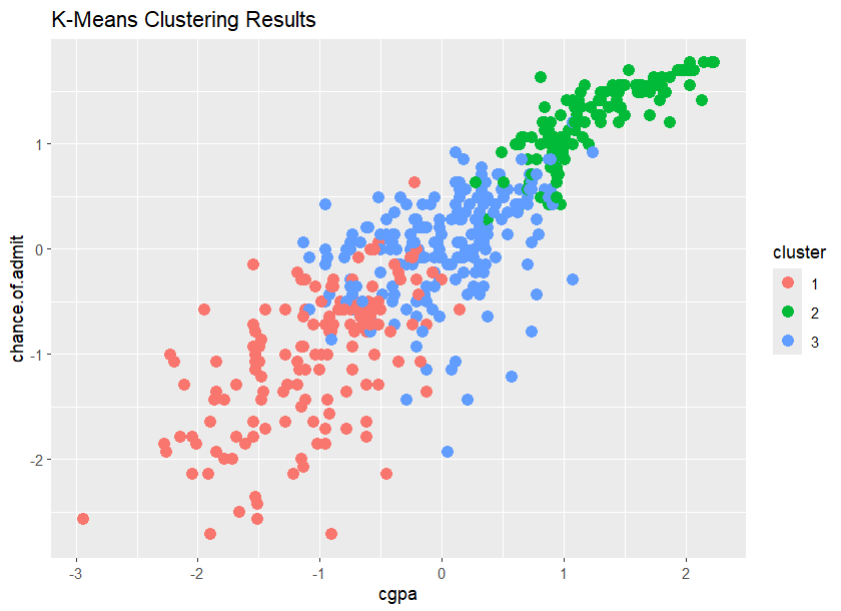

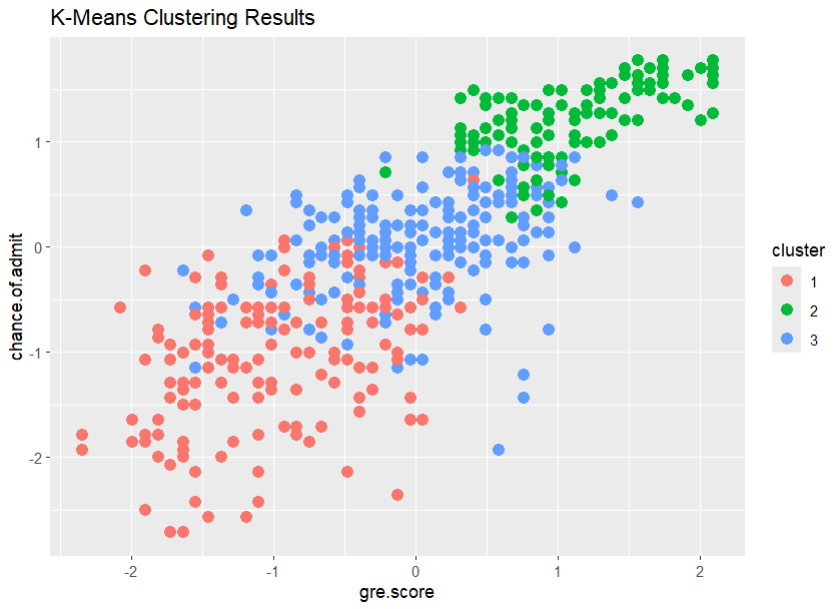
